# Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# load merged file
#df = pd.read_csv("merged_TCS_TA_mod_fixed.csv", delimiter = ",")
# df = pd.read_csv("TCS_all_participants.csv", delimiter = ",")
df = pd.read_csv("TCS_65_participants.csv", delimiter = ",")

# Eliminate some columns we won't be using for now
del df['timestamp']
del df['Day']
del df['Time Broken']
del df['Day_Time']
del df['Text(Day_Time)']
del df['Total Seconds']
del df['Diff Seconds']
del df['Temperature']
del df['ThermalComfort']
del df['TopClothing']
del df['BottomClothing']
del df['OuterLayerClothing']
del df['ActivityDescription']
del df['Thermal Comfort TA']

# # Room temperature barely changed
# df = df[df['Participant_No'] != 9] # also not enough SurveyData instances

# # Room temperature not recorded
# df = df[df['Participant_No'] != 13] 

# # Not enough SurveyData instances
# df = df[df['Participant_No'] != 3]
# # df = df[df['Participant_No'] != 52]
# df = df[df['Participant_No'] != 69]

# # No BandData instances at all
# df = df[df['Participant_No'] != 10] # also temperature barely changed here
# df = df[df['Participant_No'] != 26]
# df = df[df['Participant_No'] != 28]
# df = df[df['Participant_No'] != 36]
# df = df[df['Participant_No'] != 37]
# df = df[df['Participant_No'] != 38]
# df = df[df['Participant_No'] != 39]
# df = df[df['Participant_No'] != 47]
# df = df[df['Participant_No'] != 48]
# df = df[df['Participant_No'] != 53]
# df = df[df['Participant_No'] != 56] # it does have some bandData instances for the handful of SurveyData

df.reset_index()# reset index
df = df.fillna(0) # fill NaN with 0

# creeate two datasets based on type of instances
df_survey = df[df['class'] == 'SurveyData']
df_band = df[df['class'] == 'BandData']

del df_band['class']
del df_survey['class']


# Descriptive Statistics

Number of participants:  65 

Number of Survey instances:  1770 

Number of Band instances:  5319 

Features in the dataset:  ['Participant_No', 'Temperature (Fahrenheit)', 'MinuteCalories', 'Gsr', 'SkinTemperature', 'ClothingInsulation', 'Activity', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender', 'Discrete Thermal Comfort_TA'] 

Survey Dataset description: 
        Participant_No  Temperature (Fahrenheit)  MinuteCalories  \
count      1770.000000               1770.000000     1770.000000   
unique             NaN                       NaN             NaN   
top                NaN                       NaN             NaN   
freq               NaN                       NaN             NaN   
mean         41.020904                 71.382949        1.238485   
std          24.370448                  6.273718        0.714473   
min           1.000000                 60.070000        0.000000   
25%          19.000000                 65.500000        1.052632   
50%   

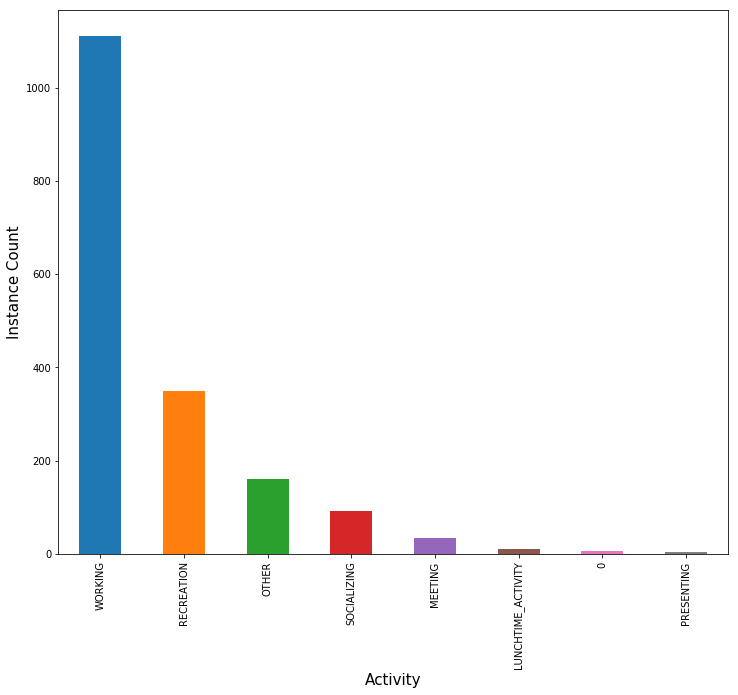

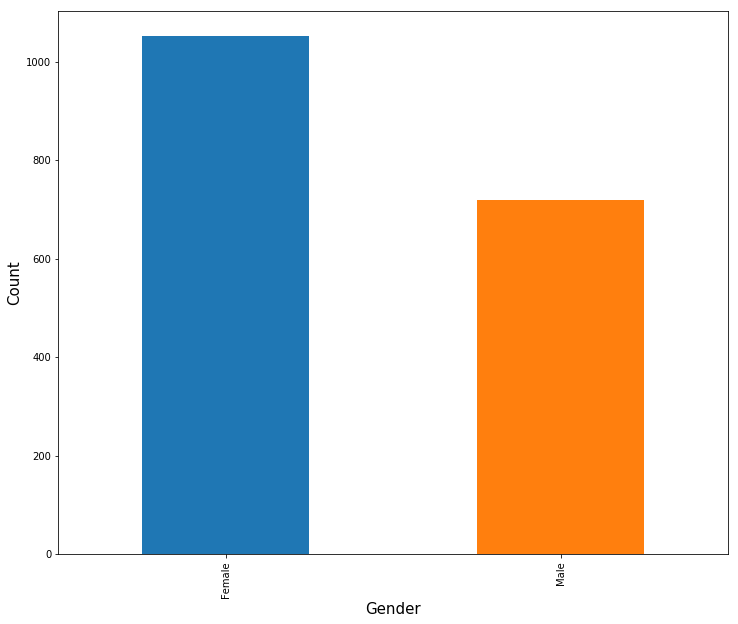

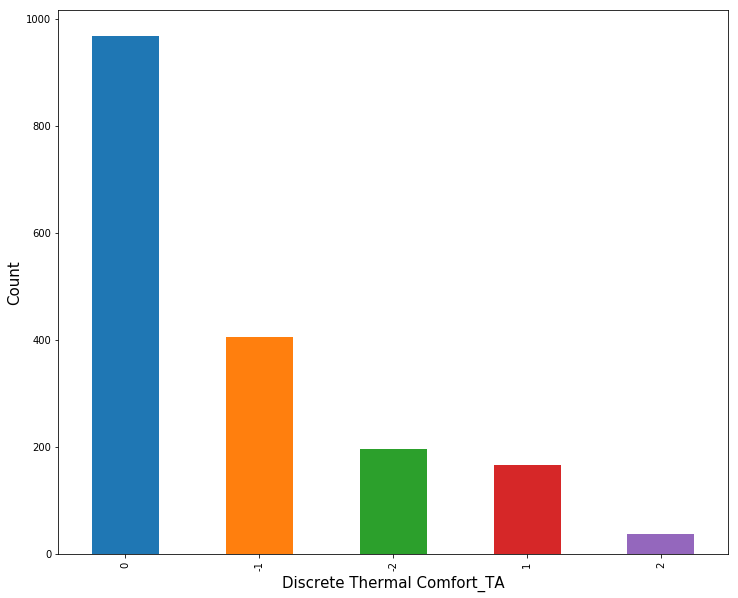

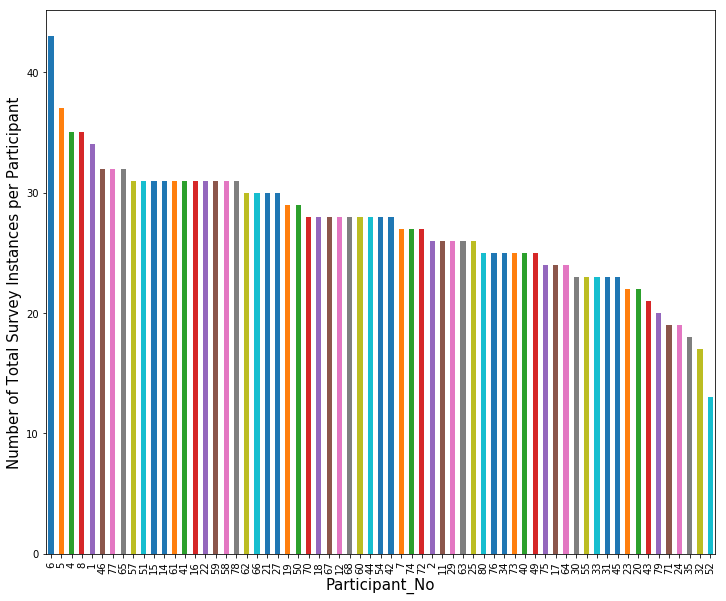

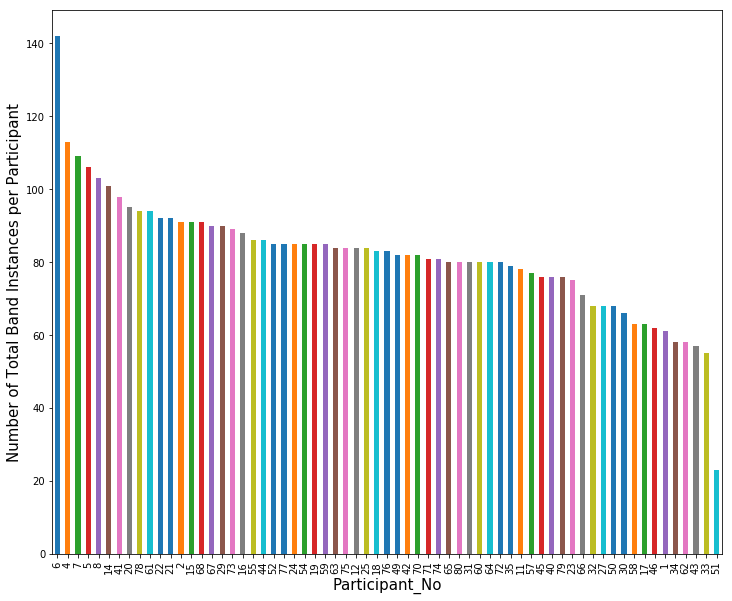

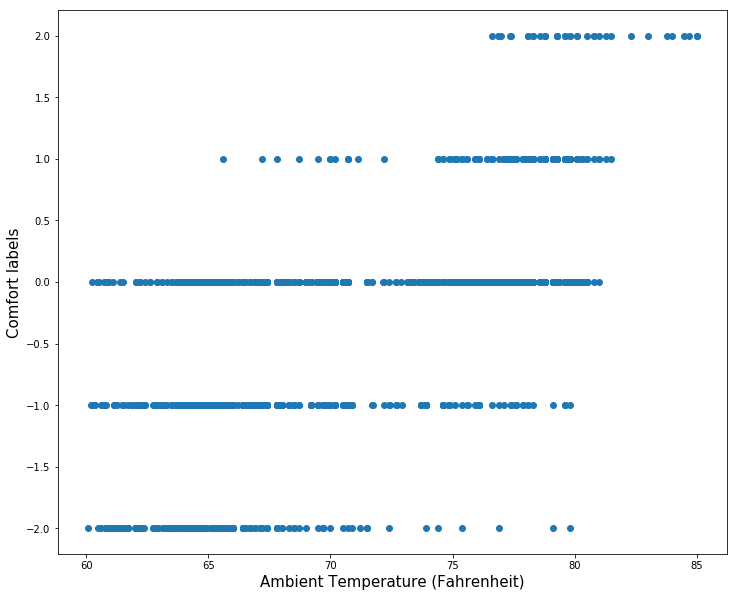

In [2]:
# number of participants in the dataset
num_participant = df['Participant_No'].nunique()

# list of participants id in the dataset
participants_list = df['Participant_No'].unique()

print "Number of participants: ", num_participant, "\n"
print "Number of Survey instances: ", len(df_survey), "\n"
print "Number of Band instances: ", len(df_band), "\n"
print "Features in the dataset: ", list(df_survey), "\n"
print "Survey Dataset description: "
print df_survey.describe(include = 'all')
print "\nBand Dataset description: "
print df_band.describe(include = 'all')

# Activity Histrogram
ax_activity = df_survey['Activity'].value_counts().plot(kind = 'bar',figsize = (12,10))
ax_activity.set_xlabel("Activity", fontsize = 15)
ax_activity.set_ylabel("Instance Count", fontsize = 15)
plt.show()

# TODO histogram of how many participants are male or female
# Gender Histogram
ax_gender = df_survey['Gender'].value_counts().plot(kind = 'bar', figsize = (12,10))
ax_gender.set_xlabel("Gender", fontsize = 15)
ax_gender.set_ylabel("Count", fontsize = 15)
plt.show()

# Output labels (thermal comfort) histogram
ax_output = df_survey['Discrete Thermal Comfort_TA'].value_counts().plot(kind = 'bar', figsize = (12,10))
ax_output.set_xlabel("Discrete Thermal Comfort_TA", fontsize = 15)
ax_output.set_ylabel("Count", fontsize = 15)
plt.show()

# Histogram of instances per participant
ax_participant = df_survey['Participant_No'].value_counts().plot(kind = 'bar', figsize = (12,10))
ax_participant.set_xlabel("Participant_No", fontsize = 15)
ax_participant.set_ylabel("Number of Total Survey Instances per Participant", fontsize = 15)
plt.show()

ax_participant = df_band['Participant_No'].value_counts().plot(kind = 'bar', figsize = (12,10))
ax_participant.set_xlabel("Participant_No", fontsize = 15)
ax_participant.set_ylabel("Number of Total Band Instances per Participant", fontsize = 15)
plt.show()


# Output labels (thermal comfort) temperature ranges
fig = plt.figure(figsize=(12, 10))
plt.scatter(df_survey['Temperature (Fahrenheit)'], df_survey['Discrete Thermal Comfort_TA'])
plt.ylabel('Comfort labels', fontsize = 15)
plt.xlabel('Ambient Temperature (Fahrenheit)', fontsize = 15)
plt.show()


# Feature Selection

In [3]:
df_encoded = df_survey.copy()

# encoding categorical variables
for col in df_encoded.columns.values:
    le = LabelEncoder()
    if df_encoded[col].dtypes == 'object':
        df_encoded[col] = df_encoded[col].astype(str)
        le.fit(df_encoded[col])
        df_encoded[col]=le.transform(df_encoded[col])

# creating two different datasets based on features
df_feature1 = df_encoded.copy()

feature_set1 = list(df_feature1)[:-1]
num_feature_set1 = len(feature_set1)

df_feature2 = df_encoded.copy()
del df_feature2['MinuteCalories']
del df_feature2['Gsr']
del df_feature2['SkinTemperature']
del df_feature2['ClothingInsulation']
del df_feature2['Activity']
del df_feature2['Weight(lbs)']
del df_feature2['Gender']
feature_set2 = list(df_feature2)[:-1]
num_feature_set2 = len(feature_set2)

df_feature3 = df_feature2.copy()
del df_feature3['Height(cm)']
del df_feature3['Shoulder Circumference(cm)']
feature_set3 = list(df_feature3)[:-1]
num_feature_set3 = len(feature_set3)

print "Feature Set 1: ", feature_set1
print "\nNumber of features in this set: ", num_feature_set1
print "\nFeature Set 2: ", feature_set2
print "\nNumber of features in this set: ", num_feature_set2
print "\nFeature Set 3: ", feature_set3
print"\nNumber of features in this set: ", num_feature_set3


Feature Set 1:  ['Participant_No', 'Temperature (Fahrenheit)', 'MinuteCalories', 'Gsr', 'SkinTemperature', 'ClothingInsulation', 'Activity', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']

Number of features in this set:  11

Feature Set 2:  ['Participant_No', 'Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']

Number of features in this set:  4

Feature Set 3:  ['Participant_No', 'Temperature (Fahrenheit)']

Number of features in this set:  2


## Linear Regression

In [4]:
# feature analysis using linear regression
from sklearn import linear_model  
from sklearn import preprocessing
import numpy as np

# randomize dataset
df_no_subjects_lm = df_feature1.sample(frac = 1).reset_index(drop = True)

# since is one model for all participants, we don't need the 'Participant_No' feature
del df_no_subjects_lm['Participant_No']

X = np.array(df_no_subjects_lm.iloc[:, 0:len(list(df_no_subjects_lm)[:-1])])
# scale data
scaled_X = preprocessing.scale(X)

y = np.array(df_no_subjects_lm['Discrete Thermal Comfort_TA'])

lm = linear_model.LinearRegression()  
lm.fit(X, y) 
# lm.fit(scaled_X, y)

df_lm_coef = pd.DataFrame(zip(df_no_subjects_lm.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

# print df_lm_coef

df_lm_coef.sort_values(['estimatedCoefficients'], ascending=False)


,features,estimatedCoefficients
0,Temperature (Fahrenheit),8.621531e-02
1,MinuteCalories,3.794873e-02
7,Shoulder Circumference(cm),1.226489e-02
5,Activity,9.294384e-03
9,Gender,8.531933e-03
2,Gsr,7.119259e-07
8,Weight(lbs),-1.503109e-03
6,Height(cm),-5.089253e-03
3,SkinTemperature,-6.609993e-03
4,ClothingInsulation,-6.673030e-01


Since _**Gsr**_ contributes significantly less than other features, it will not be used in further analysis

## PCA

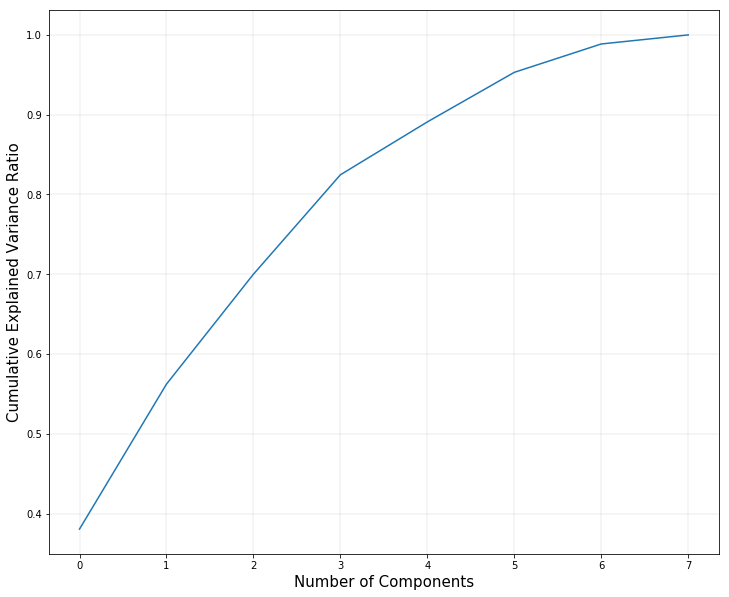

In [5]:
from sklearn.decomposition import PCA

# randomize dataset
df_pca = df_feature1.sample(frac = 1).reset_index(drop = True)

del df_pca['Participant_No']
del df_pca['Gsr']
del df_pca['Activity']

X = np.array(df_pca.iloc[:, 0:len(list(df_pca)[:-1])])
y = np.array(df_pca['Discrete Thermal Comfort_TA'])

# scale data vectors
scaled_X = preprocessing.scale(X)

pca = PCA().fit(scaled_X)
fig = plt.figure(figsize=(12, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize = 15);
plt.grid(linewidth = 0.25)
plt.show()


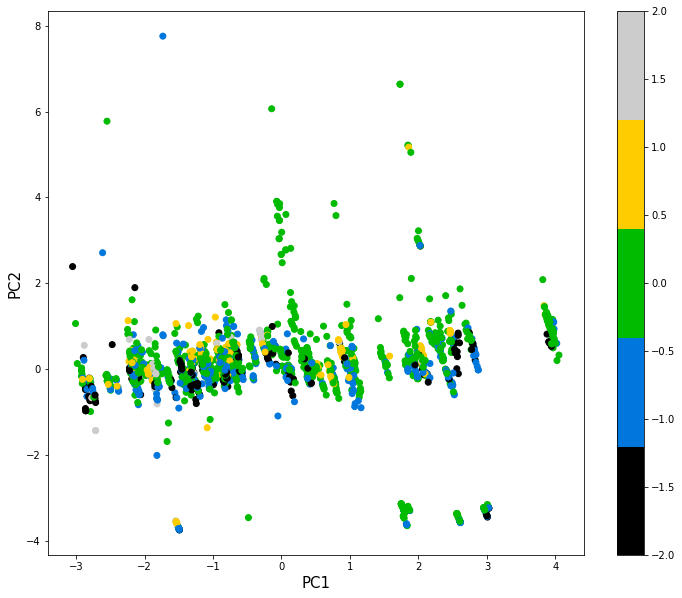

In [6]:
pca = PCA(n_components = 2).fit_transform(scaled_X)

# pcaFigure = plt.figure()
#             pcaAxes = pcaFigure.add_subplot(111)
#             for color, className in zip('bcgyr', self.classes):
#                 x = [X_pca[i, 0] for i in range(len(X_pca)) if self.labels[i] == className]
#                 y = [X_pca[i, 1] for i in range(len(X_pca)) if self.labels[i] == l]
#                 pcaAxes.scatter(x, y, c=color, label=className, s=50)
#             pcaAxes.set_xlabel('PC1')
#             pcaAxes.set_ylabel('PC2')
#             plt.legend()
#             plt.title('PCA of Thermal Comfort dataset')

pcaFigure = plt.figure(figsize=(12, 10))
plt.scatter(pca[:, 0], pca[:, 1], c = y,
            cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.colorbar();
plt.show()


## Baseline Model

Model that will only predict the 'Comfortable' label

In [7]:
import numpy as np

# split into train and test
test_size_percentage = 0.3 # if changed, change in all places

base_model_pred = np.zeros(int(round(len(df_survey) * test_size_percentage))) # comfort label is 0 in the dataset


# Participant Comfort vs Room Temperature

/home/matias/TCS/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


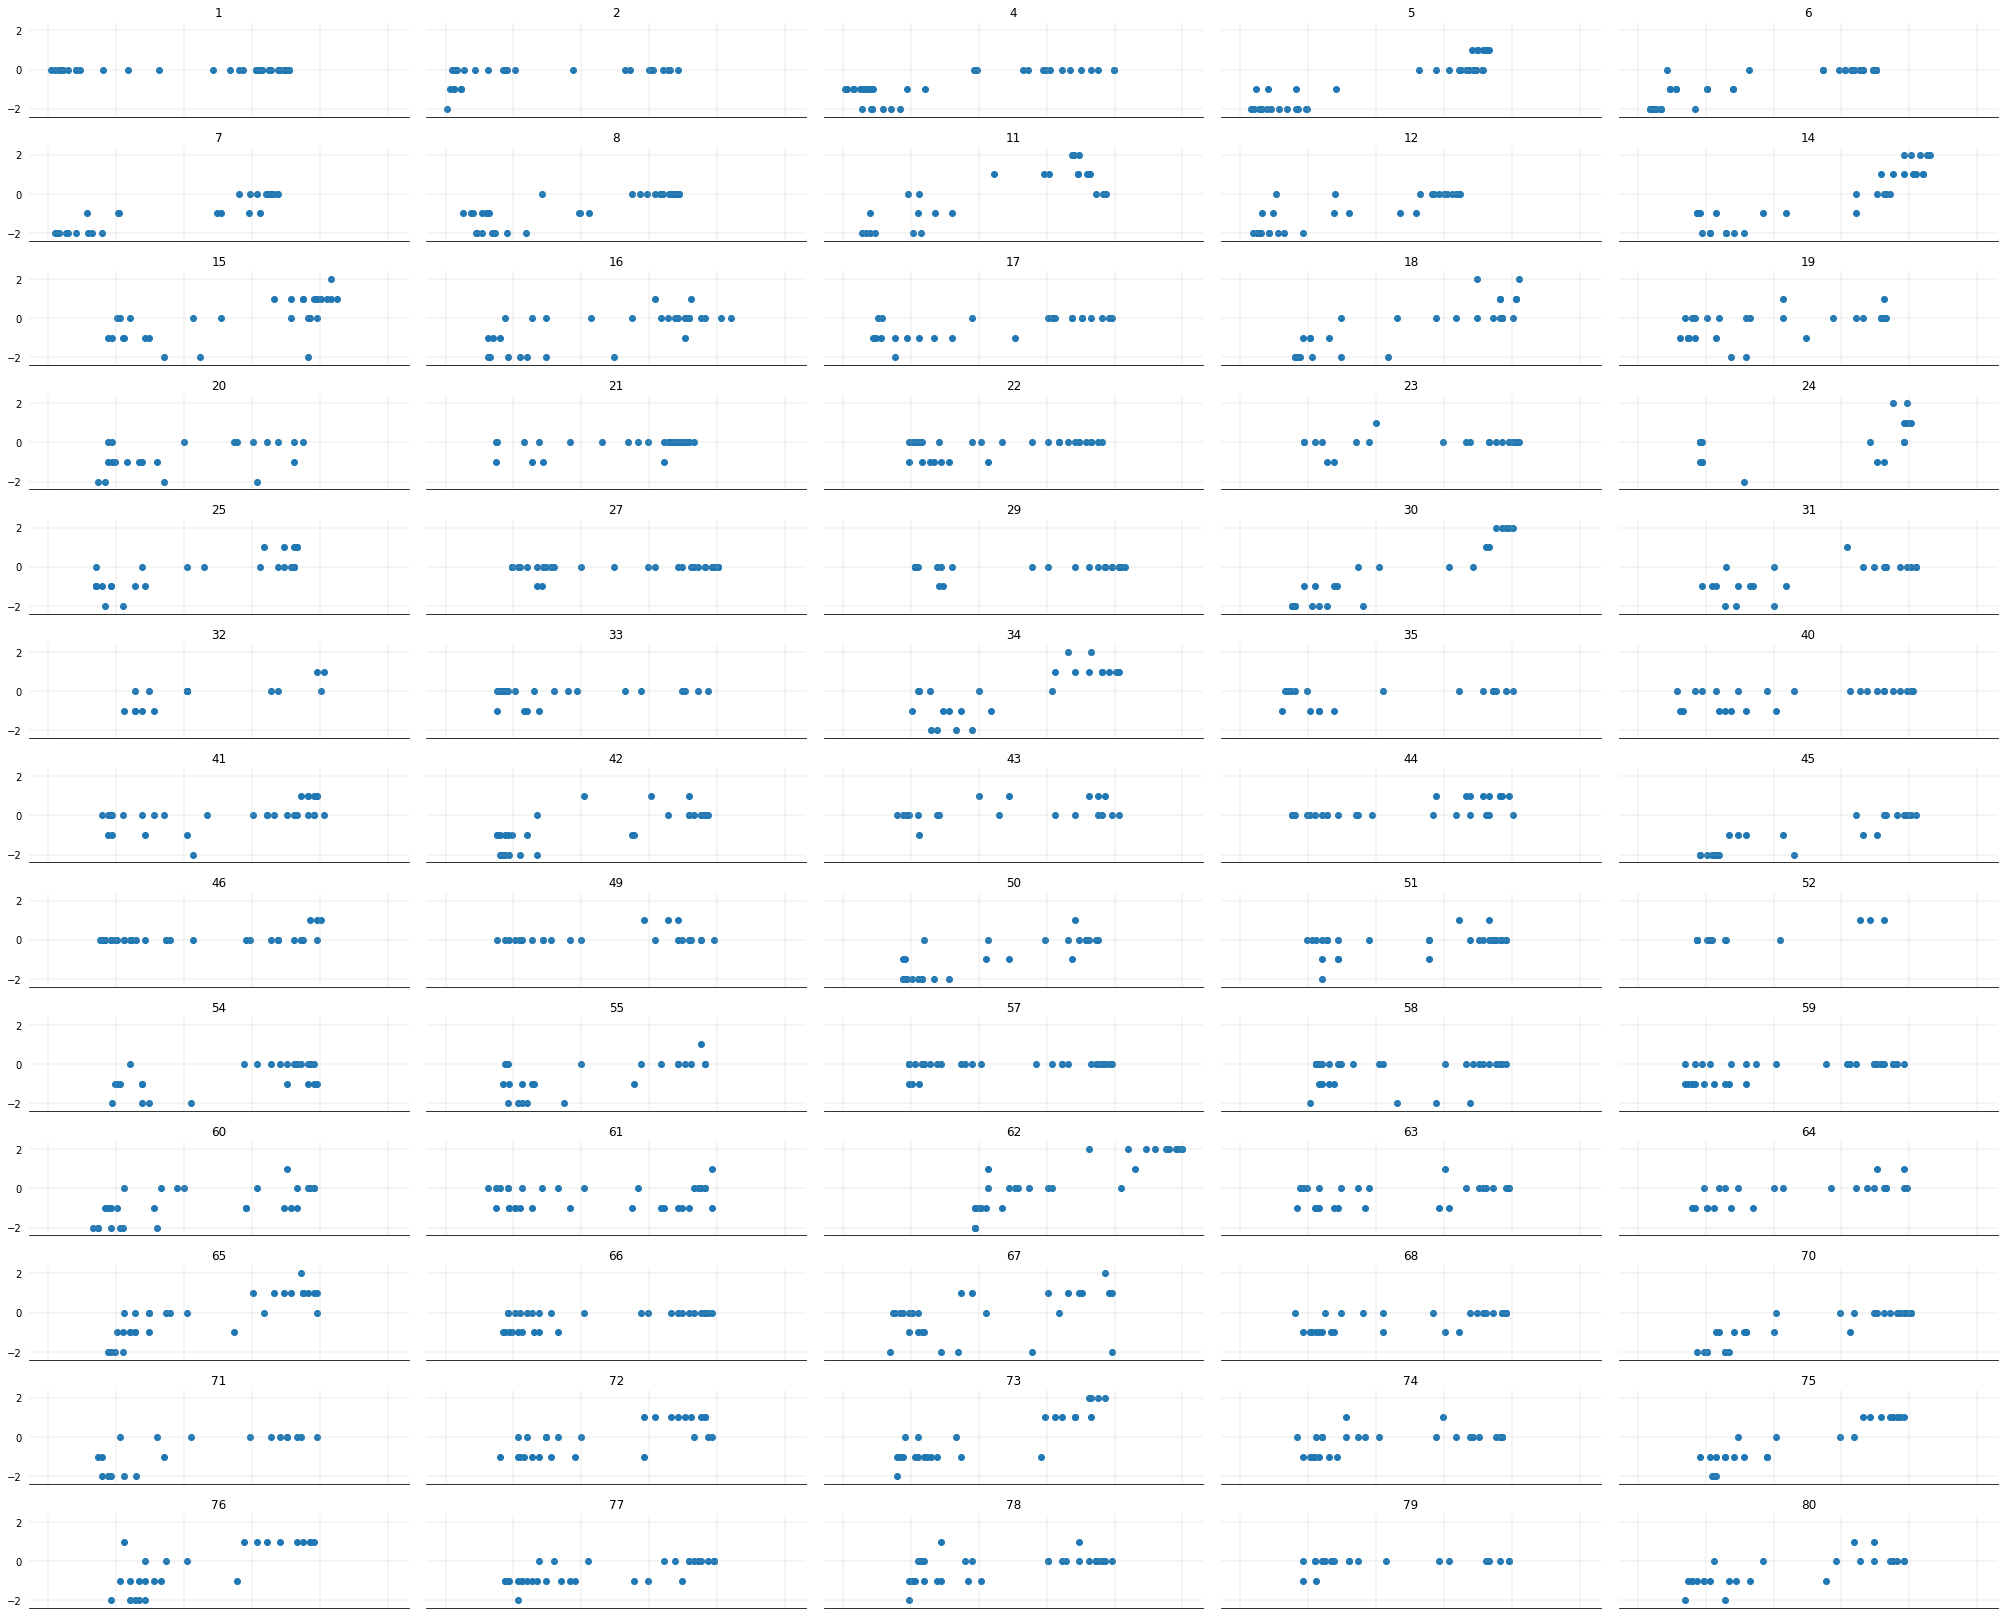

In [8]:
# individual plots (based on participants) of Thermal comfort label versus indoor temperature
fig, axes = plt.subplots(nrows=15, ncols=5, sharex=True, sharey=True, figsize=(28, 26))
axes_list = [item for sublist in axes for item in sublist] 

for participant, selection in df_survey.groupby("Participant_No"):
    ax = axes_list.pop(0)
    ax.scatter(selection['Temperature (Fahrenheit)'], selection['Discrete Thermal Comfort_TA'])
    ax.set_title(participant)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlabel("")
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()


# Participant Comfort vs Room Temperature (over time)

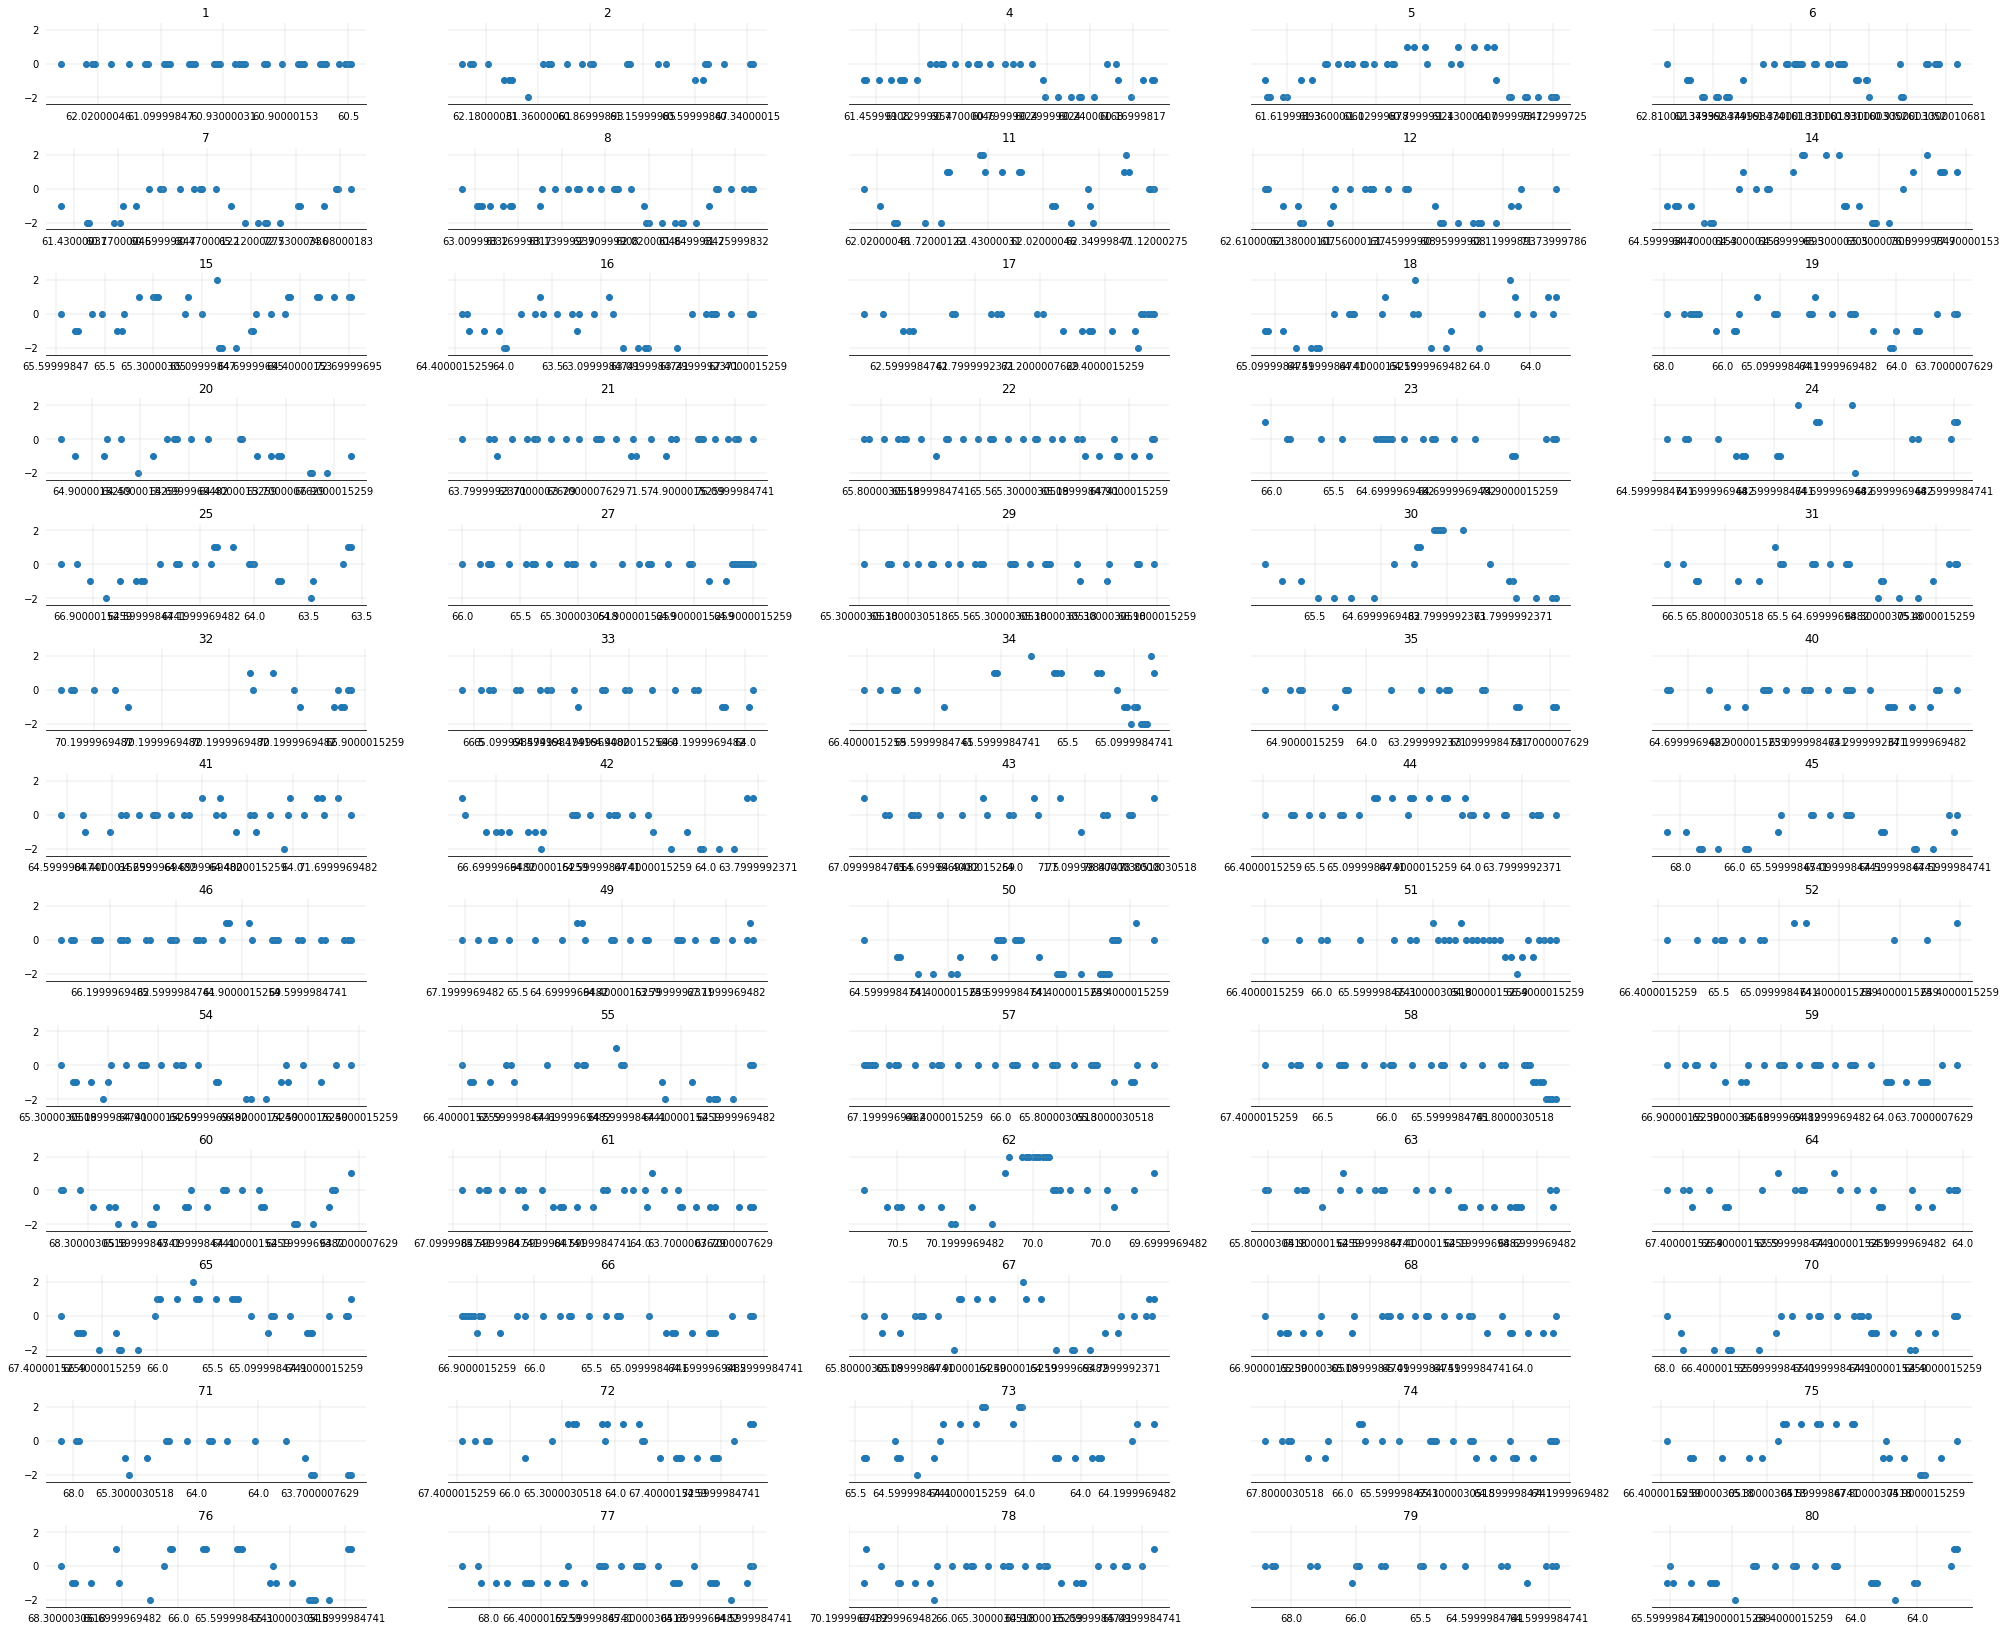

In [9]:
fig, axes = plt.subplots(nrows=15, ncols=5, sharey=True, figsize=(28, 26))
axes_list = [item for sublist in axes for item in sublist] 

for participant, selection in df_survey.groupby("Participant_No"):
    ax = axes_list.pop(0)
    selection.reset_index()
    ax.scatter(selection.index, selection['Discrete Thermal Comfort_TA'])
    ax.set_xticklabels(selection['Temperature (Fahrenheit)'])

    ax.set_title(participant)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlabel("")
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()


# Experiment 1

In [10]:
# Functions used in this project
# original code by rsukkerd on Tue Aug 2 11:34:58 2016 (Bosch occutherm models)

# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout

# training and feature selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
# from keras.optimizers import SGD

# from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn import tree

DEFAULT_K = 10 # default number of folds

# Determine number of folds
def chooseK(train_labels):
    classCounter = Counter(train_labels)
    numLeastCommonClass = min(classCounter.values())
    return min(numLeastCommonClass, DEFAULT_K)

# Choose the best combination of parameters for a given model
def selectModelParameters(train_vectors, train_labels, trainclf, parameters, scorer, useSampleWeight = False):
    k = chooseK(train_labels) # get number of folds
    print "Number of folds: " + str(k)
    stratifiedKFold = StratifiedKFold(n_splits = k)
    if useSampleWeight:
        n_samples = len(train_labels)
        n_classes = len(set(train_labels))
        classCounter = Counter(train_labels)
        sampleWeights = [n_samples / (n_classes * classCounter[label]) for label in train_labels]
        gridSearch = GridSearchCV(clf, parameters, cv = stratifiedKFold, scoring = scorer, fit_params = {'sample_weight' : sampleWeights})
    else:
        gridSearch = GridSearchCV(clf, parameters, cv = stratifiedKFold, scoring = scorer)
    
    gridSearch.fit(train_vectors, train_labels)
    print "Best parameters set found on development set:"
    print gridSearch.best_params_
#     print "\nGrid scores on development set using " + scorer + " : "
#     for params, mean_score, scores in gridSearch.grid_scores_:
#         print "%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params)
    
    return gridSearch.best_estimator_

# Choose the optimal depth of a tree model 
def chooseOptimalTreeDepth(clf, train_vectors, train_labels, plot = True):
    # generate a list of potential depths to calculate the optimal
    depths = list(range(1, 25))

    # empty list that will hold cv scores
    cv_scores = []

    # find optimal tree depth
    for d in depths: # TODO: try using chooseK(train_labels) instead of jus DEFAULT_K
        clf_depth = clf.set_params(max_depth = d) # use previous parameters while changing depth
        scores = cross_val_score(clf_depth, train_vectors, train_labels, cv = chooseK(train_labels), scoring = 'accuracy') # accuracy here is f1 micro
        cv_scores.append(scores.mean())

    # changing to misclassification error and determining best depth
    MSE = [1 - x for x in cv_scores] # MSE = 1 - f1_micro
    optimal_depth = depths[MSE.index(min(MSE))]
    print "The optimal depth is: ", optimal_depth, "\n"
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", cv_scores[depths.index(optimal_depth)], "\n"
    
    if plot:
        # plot misclassification error vs depths
        fig = plt.figure(figsize=(12, 10))
        plt.plot(depths, MSE)
        plt.xlabel('Tree Depth', fontsize = 20)
        plt.ylabel('Misclassification Error', fontsize = 20)
        plt.legend(fontsize = 15)
        plt.show()

    return optimal_depth

# Calculate different metrics such as f1-micro, f1-macro, confusion matrix, and the classification report
def getClfMetrics(test_labels, pred_labels):
    acc = accuracy_score(test_labels, pred_labels) 
    print "\nAccuracy (f1 micro) on test set: ", acc
    print "F1 micro on test set: ", f1_score(test_labels, pred_labels, average = 'micro')
    print "F1 macro on test set: ", f1_score(test_labels, pred_labels, average = 'macro')
    print "\nConfusion Matrix: "
    print confusion_matrix(y_test, y_pred)#, labels = [-2, -1, 0, 1, 2])
    print "\nClassification Metrics: "
    print classification_report(test_labels, pred_labels)
    return acc


## One model for all participants, Multi-class classification problem

In [13]:
# Models in mind: Random Forest, KNN, SVM, Naive Bayes, and MLP

################################################ Feature set 1 ###############################################################
df_feature1_no_subjects = df_feature1.copy()

# since is one model for all participants, we don't need the 'Participant_No' feature
del df_feature1_no_subjects['Participant_No']

# since the activity feature is heavily imbalaced
del df_feature1_no_subjects['Activity']

# based on item 3 (table of contents), Gsr will not be used
del df_feature1_no_subjects['Gsr']

# new set of features without the substrawcted features
feature_set1_no_subjects = list(df_feature1_no_subjects)[:-1]
num_feature_set1_no_subjects = len(feature_set1_no_subjects)
print "Feature Set 1 considers all features measured by the health band and phone survey"
print "Feature Set 1 (no subjects): ", feature_set1_no_subjects
print "Number of features in this set: ", num_feature_set1_no_subjects, "\n"

################################################ Feature set 2 ###############################################################
df_feature2_no_subjects = df_feature2.copy()

# since is one model for all participants, we don't need the 'Participant_No' feature
del df_feature2_no_subjects['Participant_No']

# new set of features without the substracted features
feature_set2_no_subjects = list(df_feature2_no_subjects)[:-1]
num_feature_set2_no_subjects = len(feature_set2_no_subjects)
print "Feature Set 2 only takes into account the features that FORK can potentially extract from people"
print "Feature Set 2 (no subjects): ", feature_set2_no_subjects
print "Number of features in this set: ", num_feature_set2_no_subjects, "\n"

################################################ Feature set 3 ###############################################################

df_feature3_no_subjects = df_feature3.copy()
# we only care about Temperature and label

# since is one model for all participants, we don't need the 'Participant_No' feature
del df_feature3_no_subjects['Participant_No']

# new set of features without the substracted features
feature_set3_no_subjects = list(df_feature3_no_subjects)[:-1]
num_feature_set3_no_subjects = len(feature_set3_no_subjects)

print "Feature Set 3 only uses actual room temperature"
print "Feature Set 3 (no subjects): ", feature_set3_no_subjects
print "Number of features in this set: ", num_feature_set3_no_subjects, "\n"


Feature Set 1 considers all features measured by the health band and phone survey
Feature Set 1 (no subjects):  ['Temperature (Fahrenheit)', 'MinuteCalories', 'SkinTemperature', 'ClothingInsulation', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']
Number of features in this set:  8 

Feature Set 2 only takes into account the features that FORK can potentially extract from people
Feature Set 2 (no subjects):  ['Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']
Number of features in this set:  3 

Feature Set 3 only uses actual room temperature
Feature Set 3 (no subjects):  ['Temperature (Fahrenheit)']
Number of features in this set:  1 



### Random Forest

In [14]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects.iloc[:, 0:num_feature_set1_no_subjects])
y = np.array(df_feature1_no_subjects['Discrete Thermal Comfort_TA'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_estimators' : [10, 100, 1000],
              'criterion' : ['entropy', 'gini'],
              'min_samples_split' : [2, 10, 20, 30], 
              'class_weight' : ['balanced', 'balanced_subsample']}
scorer = 'f1_micro'
clf = RandomForestClassifier(n_estimators = 10, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
rf_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 1000, 'criterion': 'gini', 'class_weight': 'balanced'}


The optimal depth is:  19 

Expected accuracy (f1 micro) based on Cross-Validation:  0.684654022755 



/home/matias/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


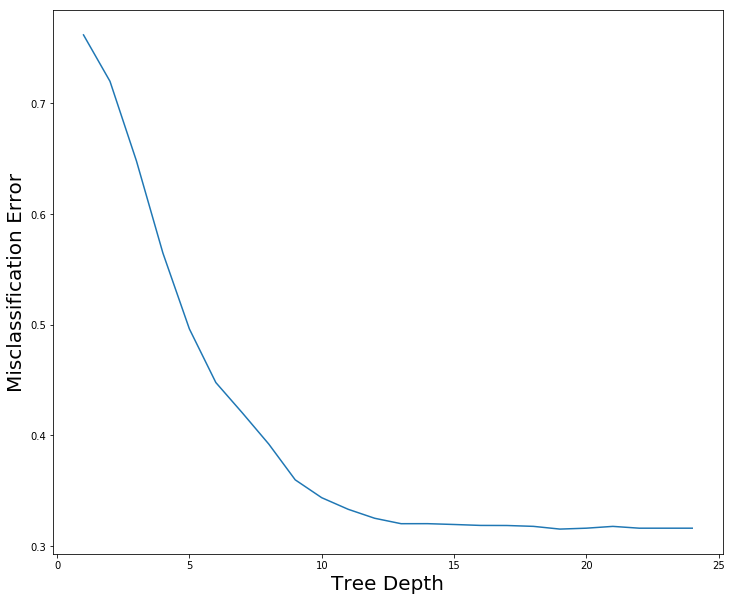

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=19, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

Accuracy (f1 micro) on test set:  0.704331450094
F1 micro on test set:  0.704331450094
F1 macro on test set:  0.662387762885

Confusion Matrix: 
[[ 36  20   3   0   0]
 [ 24  78  19   1   0]
 [  7  44 224  14   1]
 [  2   2  16  28   1]
 [  0   0   0   3   8]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.52      0.61      0.56        59
         -1       0.54      0.64      0.59       122
          0       0.85      0.77      0.81       290
          1       0.61      0.57      0.59        49
          2       0

In [15]:
################################################ Feature set 1 ###############################################################
# find optimal depth and generate model
optimal_depth = chooseOptimalTreeDepth(rf_classifier, X_train, y_train)

# generate the model with the selected paramters plus the optimal depth and do the model fitting
rf_optimal = rf_classifier.set_params(max_depth = optimal_depth)
print rf_optimal
rf_optimal.fit(X_train, y_train)

# predict the response on test set
y_pred = rf_optimal.predict(X_test)

# get metrics
rf_acc_1 = getClfMetrics(y_test, y_pred)


In [16]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects.iloc[:, 0:num_feature_set2_no_subjects])
y = np.array(df_feature2_no_subjects['Discrete Thermal Comfort_TA'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_estimators' : [10, 100, 1000],
              'criterion' : ['entropy', 'gini'],
              'min_samples_split' : [2, 10, 20, 30], 
              'class_weight' : ['balanced', 'balanced_subsample']}
scorer = 'f1_micro'
clf = RandomForestClassifier(n_estimators = 10, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
rf_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


The optimal depth is:  14 

Expected accuracy (f1 micro) based on Cross-Validation:  0.645141613946 



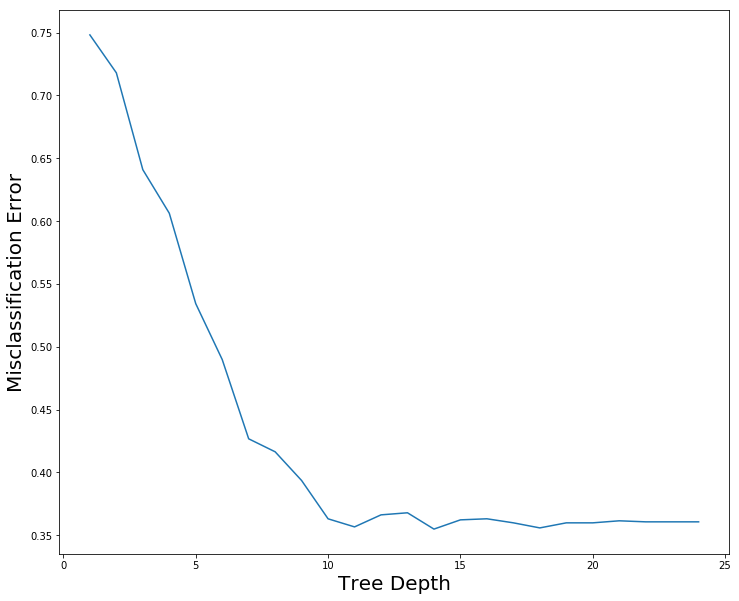

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

Accuracy (f1 micro) on test set:  0.649717514124
F1 micro on test set:  0.649717514124
F1 macro on test set:  0.541636622861

Confusion Matrix: 
[[ 27  19  12   1   0]
 [ 18  60  44   0   0]
 [  5  44 228  13   0]
 [  0   5  16  27   1]
 [  0   0   2   6   3]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.54      0.46      0.50        59
         -1       0.47      0.49      0.48       122
          0       0.75      0.79      0.77       290
          1       0.57      0.55      0.56        49
          2       0

In [17]:
################################################ Feature set 2 ###############################################################
# find optimal depth and generate model
optimal_depth = chooseOptimalTreeDepth(rf_classifier, X_train, y_train)

# generate the model with the selected paramters plus the optimal depth and do the model fitting
rf_optimal = rf_classifier.set_params(max_depth = optimal_depth)
print rf_optimal
rf_optimal.fit(X_train, y_train)

# predict the response on test set
y_pred = rf_optimal.predict(X_test)

# get metrics
rf_acc_2 = getClfMetrics(y_test, y_pred)


In [18]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects.iloc[:, 0:num_feature_set3_no_subjects])
y = np.array(df_feature3_no_subjects['Discrete Thermal Comfort_TA'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_estimators' : [10, 100, 1000],
              'criterion' : ['entropy', 'gini'],
              'min_samples_split' : [2, 10, 20, 30], 
              'class_weight' : ['balanced', 'balanced_subsample']}
scorer = 'f1_micro'
clf = RandomForestClassifier(n_estimators = 10, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
rf_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


The optimal depth is:  14 

Expected accuracy (f1 micro) based on Cross-Validation:  0.407351785121 



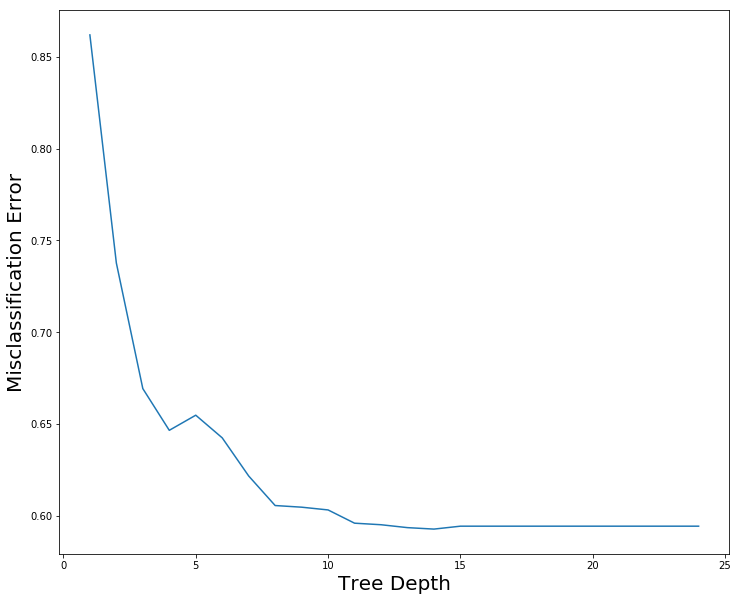

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

Accuracy (f1 micro) on test set:  0.35593220339
F1 micro on test set:  0.35593220339
F1 macro on test set:  0.310482041599

Confusion Matrix: 
[[24 30  5  0  0]
 [51 53 13  5  0]
 [49 53 83 83 22]
 [ 0  3 12 25  9]
 [ 0  0  3  4  4]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.19      0.41      0.26        59
         -1       0.38      0.43      0.41       122
          0       0.72      0.29      0.41       290
          1       0.21      0.51      0.30        49
          2       0.11      0.36      0.17    

In [19]:
################################################ Feature set 3 ###############################################################
# find optimal depth and generate model
optimal_depth = chooseOptimalTreeDepth(rf_classifier, X_train, y_train)

# generate the model with the selected paramters plus the optimal depth and do the model fitting
rf_optimal = rf_classifier.set_params(max_depth = optimal_depth)
print rf_optimal
rf_optimal.fit(X_train, y_train)

# predict the response on test set
y_pred = rf_optimal.predict(X_test)

# get metrics
rf_acc_3 = getClfMetrics(y_test, y_pred)


### KNN

In [20]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects.iloc[:, 0:num_feature_set1_no_subjects])
y = np.array(df_feature1_no_subjects['Discrete Thermal Comfort_TA'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_neighbors' : [3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
              'weights' : ['uniform', 'distance'], 
              'metric' : ['seuclidean'], 'algorithm' : ['brute']}
scorer = 'f1_micro'
clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
knn_classifier.fit(X_train, y_train)
print "\n"
print knn_classifier

# predict the response
y_pred = knn_classifier.predict(X_test)

# evaluate accuracy
knn_acc_1 = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 9, 'metric': 'seuclidean', 'weights': 'distance', 'algorithm': 'brute'}


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

Accuracy (f1 micro) on test set:  0.689265536723
F1 micro on test set:  0.689265536723
F1 macro on test set:  0.560271690619

Confusion Matrix: 
[[ 32  20   7   0   0]
 [ 28  66  28   0   0]
 [ 11  28 244   7   0]
 [  1   2  25  21   0]
 [  0   0   3   5   3]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.44      0.54      0.49        59
         -1       0.57      0.54      0.55       122
          0       0.79      0.84      0.82       290
          1       0.64      0.43      0.51        49
          2       1.00      0.27      0.43        11

avg / total       0.69      0.69      0.68       531



In [21]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects.iloc[:, 0:num_feature_set2_no_subjects])
y = np.array(df_feature2_no_subjects['Discrete Thermal Comfort_TA'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_neighbors' : [3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
              'weights' : ['uniform', 'distance'], 
              'metric' : ['seuclidean'], 'algorithm' : ['brute']}
scorer = 'f1_micro'
clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
knn_classifier.fit(X_train, y_train)
print "\n"
print knn_classifier

# predict the response
y_pred = knn_classifier.predict(X_test)

# evaluate accuracy
knn_acc_2 = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 15, 'metric': 'seuclidean', 'weights': 'distance', 'algorithm': 'brute'}


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

Accuracy (f1 micro) on test set:  0.638418079096
F1 micro on test set:  0.638418079096
F1 macro on test set:  0.510561862895

Confusion Matrix: 
[[ 24  22  12   1   0]
 [ 16  69  37   0   0]
 [  4  49 226  11   0]
 [  0   6  25  17   1]
 [  0   0   3   5   3]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.55      0.41      0.47        59
         -1       0.47      0.57      0.51       122
          0       0.75      0.78      0.76       290
          1       0.50      0.35      0.41        49
          2       0.75      0.27      0.40        11

avg / total       0.64      0.64      0.63       531



In [22]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects.iloc[:, 0:num_feature_set3_no_subjects])
y = np.array(df_feature3_no_subjects['Discrete Thermal Comfort_TA'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_neighbors' : [3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
              'weights' : ['uniform', 'distance'], 
              'metric' : ['seuclidean'], 'algorithm' : ['brute']}
scorer = 'f1_micro'
clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
knn_classifier.fit(X_train, y_train)
print "\n"
print knn_classifier

# predict the response
y_pred = knn_classifier.predict(X_test)

# evaluate accuracy
knn_acc_3 = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 15, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

Accuracy (f1 micro) on test set:  0.555555555556
F1 micro on test set:  0.555555555556
F1 macro on test set:  0.333405215382

Confusion Matrix: 
[[ 12  20  27   0   0]
 [ 10  47  65   0   0]
 [  9  47 234   0   0]
 [  0   0  49   0   0]
 [  0   0   9   0   2]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.39      0.20      0.27        59
         -1       0.41      0.39      0.40       122
          0       0.61      0.81      0.69       290
          1       0.00      0.00      0.00        49
          2       1.00      0.18      0.31        11

avg / total       0.49      0.56      0.51       531



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM

In [23]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects.iloc[:, 0:num_feature_set1_no_subjects])
y = np.array(df_feature1_no_subjects['Discrete Thermal Comfort_TA'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = [{'C' : [1, 10, 100, 1000],
               'kernel' : ['linear'], 
               'class_weight' : ['balanced']},
              {'C' : [1, 10, 100, 1000], 
               'kernel' : ['rbf'], 
               'gamma' : [0.1, 0.01, 0.001, 0.0001], 
               'class_weight' : ['balanced']}]
clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
scorer = 'f1_micro'
svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
svm_classifier.fit(X_train, y_train)
print "\n"
print svm_classifier

# predict the response
y_pred = svm_classifier.predict(X_test)

# evaluate accuracy
svm_acc_1 = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.1, 'class_weight': 'balanced'}


SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=100, shrinking=True,
  tol=0.001, verbose=False)

Accuracy (f1 micro) on test set:  0.621468926554
F1 micro on test set:  0.621468926554
F1 macro on test set:  0.573526409132

Confusion Matrix: 
[[ 43  11   5   0   0]
 [ 40  65  14   3   0]
 [ 13  52 187  38   0]
 [  1   3  13  29   3]
 [  0   0   0   5   6]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.44      0.73      0.55        59
         -1       0.50      0.53      0.51       122
          0       0.85      0.64      0.73       290
          1       0.39      0.59      0.47        49
          2       0.67      0.55      0.60        11

avg / total       0.68   

In [24]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects.iloc[:, 0:num_feature_set2_no_subjects])
y = np.array(df_feature2_no_subjects['Discrete Thermal Comfort_TA'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = [{'C' : [1, 10, 100, 1000],
               'kernel' : ['linear'], 
               'class_weight' : ['balanced']},
              {'C' : [1, 10, 100, 1000], 
               'kernel' : ['rbf'], 
               'gamma' : [0.1, 0.01, 0.001, 0.0001], 
               'class_weight' : ['balanced']}]
clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
scorer = 'f1_micro'
svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
svm_classifier.fit(X_train, y_train)
print "\n"
print svm_classifier

# predict the response
y_pred = svm_classifier.predict(X_test)

# evaluate accuracy
svm_acc_2 = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.1, 'class_weight': 'balanced'}


SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=100, shrinking=True,
  tol=0.001, verbose=False)

Accuracy (f1 micro) on test set:  0.401129943503
F1 micro on test set:  0.401129943503
F1 macro on test set:  0.375390319152

Confusion Matrix: 
[[43 13  3  0  0]
 [58 50  6  8  0]
 [34 62 84 92 18]
 [ 1  3  7 30  8]
 [ 0  0  0  5  6]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.32      0.73      0.44        59
         -1       0.39      0.41      0.40       122
          0       0.84      0.29      0.43       290
          1       0.22      0.61      0.33        49
          2       0.19      0.55      0.28        11

avg / total       0.61      0.40      0.41       5

In [26]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects.iloc[:, 0:num_feature_set3_no_subjects])
y = np.array(df_feature3_no_subjects['Discrete Thermal Comfort_TA'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = [{'C' : [1, 10, 100, 1000],
               'kernel' : ['linear'], 
               'class_weight' : ['balanced']},
              {'C' : [1, 10, 100, 1000], 
               'kernel' : ['rbf'], 
               'gamma' : [0.1, 0.01, 0.001, 0.0001], 
               'class_weight' : ['balanced']}]
clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
scorer = 'f1_micro'
svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
svm_classifier.fit(X_train, y_train)
print "\n"
print svm_classifier

# predict the response
y_pred = svm_classifier.predict(X_test)

# evaluate accuracy
svm_acc_3 = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.1, 'class_weight': 'balanced'}


SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=100, shrinking=True,
  tol=0.001, verbose=False)

Accuracy (f1 micro) on test set:  0.273069679849
F1 micro on test set:  0.273069679849
F1 macro on test set:  0.296939234609

Confusion Matrix: 
[[ 35  23   0   1   0]
 [ 52  57   5   8   0]
 [ 40  70  10 162   8]
 [  0   6   0  38   5]
 [  0   0   0   6   5]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.28      0.59      0.38        59
         -1       0.37      0.47      0.41       122
          0       0.67      0.03      0.07       290
          1       0.18      0.78      0.29        49
          2       0.28      0.45      0.34        11

avg / total       0.50   

### Naive Bayes

In [27]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects.iloc[:, 0:num_feature_set1_no_subjects])
y = np.array(df_feature1_no_subjects['Discrete Thermal Comfort_TA'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# instantiate learning model
nb_classifier = GaussianNB() # TODO get priors?

# k-fold cross validation
scores = cross_val_score(nb_classifier, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

# fitting the model
nb_classifier.fit(X_train, y_train)
print "\n"
print nb_classifier

# predict the response
y_pred = nb_classifier.predict(X_test)

# Metrics
nb_acc_1 = getClfMetrics(y_test, y_pred)


Expected accuracy (f1 micro) based on Cross-Validation:  0.439408597411


GaussianNB(priors=None)

Accuracy (f1 micro) on test set:  0.480225988701
F1 micro on test set:  0.480225988701
F1 macro on test set:  0.376302238372

Confusion Matrix: 
[[ 40   8  11   0   0]
 [ 54  31  32   5   0]
 [ 33  35 166  39  17]
 [  1   0  25  11  12]
 [  0   0   3   1   7]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.31      0.68      0.43        59
         -1       0.42      0.25      0.32       122
          0       0.70      0.57      0.63       290
          1       0.20      0.22      0.21        49
          2       0.19      0.64      0.30        11

avg / total       0.54      0.48      0.49       531



In [28]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects.iloc[:, 0:num_feature_set2_no_subjects])
y = np.array(df_feature2_no_subjects['Discrete Thermal Comfort_TA'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# instantiate learning model
nb_classifier = GaussianNB() # TODO get priors?

# k-fold cross validation
scores = cross_val_score(nb_classifier, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

# fitting the model
nb_classifier.fit(X_train, y_train)
print "\n"
print nb_classifier

# predict the response
y_pred = nb_classifier.predict(X_test)

# Metrics
nb_acc_2 = getClfMetrics(y_test, y_pred)


Expected accuracy (f1 micro) based on Cross-Validation:  0.557900128898


GaussianNB(priors=None)

Accuracy (f1 micro) on test set:  0.551789077213
F1 micro on test set:  0.551789077213
F1 macro on test set:  0.348478829163

Confusion Matrix: 
[[  6  46   7   0   0]
 [ 10  69  43   0   0]
 [  5  65 213   0   7]
 [  0   0  49   0   0]
 [  0   0   6   0   5]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.29      0.10      0.15        59
         -1       0.38      0.57      0.46       122
          0       0.67      0.73      0.70       290
          1       0.00      0.00      0.00        49
          2       0.42      0.45      0.43        11

avg / total       0.49      0.55      0.51       531



In [29]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects.iloc[:, 0:num_feature_set3_no_subjects])
y = np.array(df_feature3_no_subjects['Discrete Thermal Comfort_TA'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# instantiate learning model
nb_classifier = GaussianNB() # TODO get priors?

# k-fold cross validation
scores = cross_val_score(nb_classifier, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

# fitting the model
nb_classifier.fit(X_train, y_train)
print "\n"
print nb_classifier

# predict the response
y_pred = nb_classifier.predict(X_test)

# Metrics
nb_acc_3 = getClfMetrics(y_test, y_pred)


Expected accuracy (f1 micro) based on Cross-Validation:  0.57162430383


GaussianNB(priors=None)

Accuracy (f1 micro) on test set:  0.559322033898
F1 micro on test set:  0.559322033898
F1 macro on test set:  0.239268292683

Confusion Matrix: 
[[  0  51   8   0   0]
 [  0  81  41   0   0]
 [  0  74 216   0   0]
 [  0   0  49   0   0]
 [  0   0  11   0   0]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.00      0.00      0.00        59
         -1       0.39      0.66      0.49       122
          0       0.66      0.74      0.70       290
          1       0.00      0.00      0.00        49
          2       0.00      0.00      0.00        11

avg / total       0.45      0.56      0.50       531



### MLP

In [30]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects.iloc[:, 0:num_feature_set1_no_subjects]) # since we are not using participant, -1
y = np.array(df_feature1_no_subjects['Discrete Thermal Comfort_TA'])

# MLP is sensitive to feature scaling. 
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# # MLP for multi-class softmax classification
# # Dense(64) is a fully-connected layer with 64 hidden units.
# # in the first layer, you must specify the expected input data shape
# model.add(Dense(20, activation='relu', input_dim = 8))
# model.add(Dropout(0.5))
# model.add(Dense(20, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=sgd,
#               metrics=['accuracy'])

# model.fit(X_train, y_train,
#           epochs = 20,
#           batch_size = 128)

# # fitting the model
# model.fit(X_train, y_train, epochs = 20, batch_size = 128)

# # predict the response
# y_pred = model.predict(X_test)

# # evaluate the model
# mlp_acc_1 = getClfMetrics(y_test, y_pred)

# Using sklearn library
mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                    activation = 'tanh', 
                    solver = 'lbfgs', 
                    alpha = 0.001, 
                    learning_rate_init = 0.001, # only used with solver adam or sgd
                    max_iter = 300,
                    verbose = True,
                    random_state = 100)

# model learned
print mlp

# k-fold cross validation
scores = cross_val_score(mlp, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "\nExpected accuracy (f1 micro) based on Cross-Validation: ", scores.mean(), "\n"

# fitting the model
mlp.fit(X_train, y_train)

# predict the response
y_pred = mlp.predict(X_test)

# Metrics
mlp_acc_1 = getClfMetrics(y_test, y_pred)


MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=100,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

Expected accuracy (f1 micro) based on Cross-Validation:  0.619210457079 


Accuracy (f1 micro) on test set:  0.629001883239
F1 micro on test set:  0.629001883239
F1 macro on test set:  0.458897060386

Confusion Matrix: 
[[ 23  24  12   0   0]
 [ 21  57  42   2   0]
 [  7  36 238   9   0]
 [  0   7  27  14   1]
 [  0   1   2   6   2]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.45      0.39      0.42        59
         -1       0.46      0.47      0.46       122
          0       0.74      0.82      0.78    

In [31]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects.iloc[:, 0:num_feature_set2_no_subjects]) # since we are not using participant, -1
y = np.array(df_feature2_no_subjects['Discrete Thermal Comfort_TA'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# TODO: keras

# MLP is sensitive to feature scaling. 
mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                    activation = 'tanh', 
                    solver = 'lbfgs', 
                    alpha = 0.001, 
                    learning_rate_init = 0.001, # only used with solver adam or sgd
                    max_iter = 300,
                    verbose = True,
                    random_state = 100)

# model learned
print mlp

# k-fold cross validation
scores = cross_val_score(mlp, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "\nExpected accuracy (f1 micro) based on Cross-Validation: ", scores.mean(), "\n"

# fitting the model
mlp.fit(X_train, y_train)

# predict the response
y_pred = mlp.predict(X_test)

# Metrics
mlp_acc_2 = getClfMetrics(y_test, y_pred)

MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=100,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

Expected accuracy (f1 micro) based on Cross-Validation:  0.602041565657 


Accuracy (f1 micro) on test set:  0.636534839925
F1 micro on test set:  0.636534839925
F1 macro on test set:  0.459024198497

Confusion Matrix: 
[[ 17  35   7   0   0]
 [ 14  70  38   0   0]
 [ 10  38 239   3   0]
 [  2   0  36   9   2]
 [  0   0   5   3   3]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.40      0.29      0.33        59
         -1       0.49      0.57      0.53       122
          0       0.74      0.82      0.78    

In [32]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects.iloc[:, 0:num_feature_set3_no_subjects]) # since we are not using participant, -1
y = np.array(df_feature3_no_subjects['Discrete Thermal Comfort_TA'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# TODO: keras

# MLP is sensitive to feature scaling. 
mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                    activation = 'tanh', 
                    solver = 'lbfgs', 
                    alpha = 0.001, 
                    learning_rate_init = 0.001, # only used with solver adam or sgd
                    max_iter = 300,
                    verbose = True,
                    random_state = 100)

# model learned
print mlp

# k-fold cross validation
scores = cross_val_score(mlp, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "\nExpected accuracy (f1 micro) based on Cross-Validation: ", scores.mean(), "\n"

# fitting the model
mlp.fit(X_train, y_train)

# predict the response
y_pred = mlp.predict(X_test)

# Metrics
mlp_acc_3 = getClfMetrics(y_test, y_pred)


MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=100,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

Expected accuracy (f1 micro) based on Cross-Validation:  0.578809379845 


Accuracy (f1 micro) on test set:  0.56120527307
F1 micro on test set:  0.56120527307
F1 macro on test set:  0.353934503152

Confusion Matrix: 
[[ 10  23  26   0   0]
 [  6  38  78   0   0]
 [  4  40 246   0   0]
 [  0   0  48   1   0]
 [  0   0   7   1   3]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.50      0.17      0.25        59
         -1       0.38      0.31      0.34       122
          0       0.61      0.85      0.71      

### Results


Accuracy (f1 micro) on test set:  0.546139359699
F1 micro on test set:  0.546139359699
F1 macro on test set:  0.141291108404

Confusion Matrix: 
[[ 10  23  26   0   0]
 [  6  38  78   0   0]
 [  4  40 246   0   0]
 [  0   0  48   1   0]
 [  0   0   7   1   3]]

Classification Metrics: 
             precision    recall  f1-score   support

         -2       0.00      0.00      0.00        59
         -1       0.00      0.00      0.00       122
          0       0.55      1.00      0.71       290
          1       0.00      0.00      0.00        49
          2       0.00      0.00      0.00        11

avg / total       0.30      0.55      0.39       531

Metric: F1-score micro
Data Split: 30% Test, 70% Train


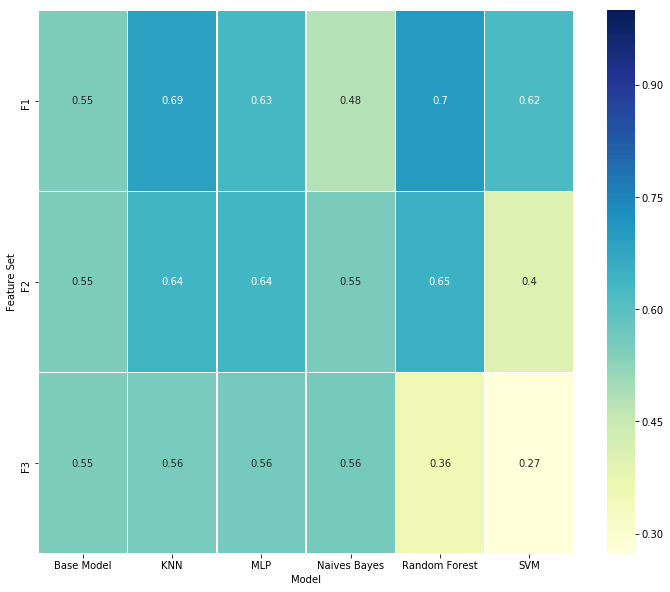

Target Labels:  [-1 -2  0  1  2]
Feature Set 1:  ['Temperature (Fahrenheit)', 'MinuteCalories', 'SkinTemperature', 'ClothingInsulation', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']
Feature Set 2:  ['Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']
Feature Set 3:  ['Temperature (Fahrenheit)']


In [42]:
# comparing base model
base_model_acc = getClfMetrics(y_test, base_model_pred)

# heatmap library
import seaborn as sns

experiment_acc_both_features = pd.DataFrame([['Random Forest', 'F1', rf_acc_1], 
                                ['KNN', 'F1', knn_acc_1],
                                ['SVM', 'F1', svm_acc_1],
                                ['Naives Bayes', 'F1', nb_acc_1],
                                ['MLP', 'F1', mlp_acc_1],
                                ['Random Forest', 'F2', rf_acc_2], 
                                ['KNN', 'F2', knn_acc_2],
                                ['SVM', 'F2', svm_acc_2],
                                ['Naives Bayes', 'F2', nb_acc_2],
                                ['MLP', 'F2', mlp_acc_2],
                                ['Random Forest', 'F3', rf_acc_3], 
                                ['KNN', 'F3', knn_acc_3],
                                ['SVM', 'F3', svm_acc_3],
                                ['Naives Bayes', 'F3', nb_acc_3],
                                ['MLP', 'F3', mlp_acc_3],
                                ['Base Model', 'F1', base_model_acc],
                                ['Base Model', 'F2', base_model_acc],
                                ['Base Model', 'F3', base_model_acc]],
                          columns = ['Model', 'Feature Set', 'Accuracy'])

# plot heatmap
print "Metric: F1-score micro"
print "Data Split: 30% Test, 70% Train"
experiment_acc_both_features = experiment_acc_both_features.pivot("Feature Set", "Model", "Accuracy")
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(experiment_acc_both_features, linewidths = 0.5, annot = True, vmax = 1, cmap = "YlGnBu")
plt.show()

print "Target Labels: ", df_feature1_no_subjects['Discrete Thermal Comfort_TA'].unique()
print "Feature Set 1: ", feature_set1_no_subjects
print "Feature Set 2: ", feature_set2_no_subjects
print "Feature Set 3: ", feature_set3_no_subjects


## One model for all participants, Binary classification problem

In [43]:
# Models in mind: Random Forest, KNN, SM, Naive Bayes, and MLP
df_feature1_binary = df_feature1.copy()
df_feature2_binary = df_feature2.copy()
df_feature3_binary = df_feature3.copy()

df_feature1_binary['Discomfort'] = df_feature1_binary['Discrete Thermal Comfort_TA'].map(lambda x: 1 if x != 0 else 0)
df_feature2_binary['Discomfort'] = df_feature2_binary['Discrete Thermal Comfort_TA'].map(lambda x: 1 if x != 0 else 0)
df_feature3_binary['Discomfort'] = df_feature3_binary['Discrete Thermal Comfort_TA'].map(lambda x: 1 if x != 0 else 0)

################################################ Feature set 1 ###############################################################
df_feature1_no_subjects_binary = df_feature1_binary.copy()

# since is one model for all participants, we don't need the 'Participant_No' feature
del df_feature1_no_subjects_binary['Participant_No']

# since the activity feature is heavily imbalaced
del df_feature1_no_subjects_binary['Activity']

# based on item 3 (table of contents), Gsr will not be used
del df_feature1_no_subjects_binary['Gsr']

# drop the multiclass target and keep the binary
del df_feature1_no_subjects_binary['Discrete Thermal Comfort_TA']

# new set of features without the substrawcted features
feature_set1_no_subjects_binary = list(df_feature1_no_subjects_binary)[:-1]
num_feature_set1_no_subjects_binary = len(feature_set1_no_subjects_binary)
print "Feature Set 1 (no subjects): ", feature_set1_no_subjects_binary
print "Number of features in this set: ", num_feature_set1_no_subjects_binary, "\n"

################################################ Feature set 2 ###############################################################
df_feature2_no_subjects_binary = df_feature2_binary.copy()

# since is one model for all participants, we don't need the 'Participant_No' feature
del df_feature2_no_subjects_binary['Participant_No']

# drop the multiclass target and keep the binary
del df_feature2_no_subjects_binary['Discrete Thermal Comfort_TA']

# new set of features without the substracted features
feature_set2_no_subjects_binary = list(df_feature2_no_subjects_binary)[:-1]
num_feature_set2_no_subjects_binary = len(feature_set2_no_subjects_binary)
print "Feature Set 2 (no subjects): ", feature_set2_no_subjects_binary
print "Number of features in this set: ", num_feature_set2_no_subjects_binary, "\n"

################################################ Feature set 3 ###############################################################
df_feature3_no_subjects_binary = df_feature3_binary.copy()

# since is one model for all participants, we don't need the 'Participant_No' feature
del df_feature3_no_subjects_binary['Participant_No']

# drop the multiclass target and keep the binary
del df_feature3_no_subjects_binary['Discrete Thermal Comfort_TA']

# new set of features without the substracted features
feature_set3_no_subjects_binary = list(df_feature3_no_subjects_binary)[:-1]
num_feature_set3_no_subjects_binary = len(feature_set3_no_subjects_binary)
print "Feature Set 3 (no subjects): ", feature_set3_no_subjects_binary
print "Number of features in this set: ", num_feature_set3_no_subjects_binary, "\n"

Feature Set 1 (no subjects):  ['Temperature (Fahrenheit)', 'MinuteCalories', 'SkinTemperature', 'ClothingInsulation', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']
Number of features in this set:  8 

Feature Set 2 (no subjects):  ['Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']
Number of features in this set:  3 

Feature Set 3 (no subjects):  ['Temperature (Fahrenheit)']
Number of features in this set:  1 



### Random Forest

In [44]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects_binary.iloc[:, 0:num_feature_set1_no_subjects_binary])
y = np.array(df_feature1_no_subjects_binary['Discomfort'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_estimators' : [10, 100, 1000],
              'criterion' : ['entropy', 'gini'],
              'min_samples_split' : [2, 10, 20, 30], 
              'class_weight' : ['balanced', 'balanced_subsample']}
scorer = 'f1_micro'
clf = RandomForestClassifier(n_estimators = 10, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
rf_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 1000, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


The optimal depth is:  18 

Expected accuracy (f1 micro) based on Cross-Validation:  0.784465198007 



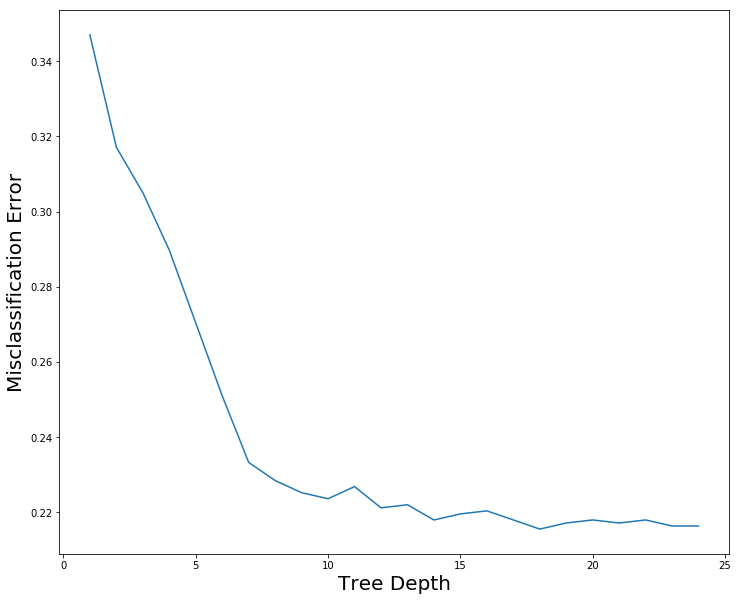

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=18, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

Accuracy (f1 micro) on test set:  0.760828625235
F1 micro on test set:  0.760828625235
F1 macro on test set:  0.760417369803

Confusion Matrix: 
[[213  77]
 [ 50 191]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.81      0.73      0.77       290
          1       0.71      0.79      0.75       241

avg / total       0.77      0.76      0.76       531



In [45]:
################################################ Feature set 1 ###############################################################
# find optimal depth and generate model
optimal_depth = chooseOptimalTreeDepth(rf_classifier, X_train, y_train)

# generate the model with the selected paramters plus the optimal depth and do the model fitting
rf_optimal = rf_classifier.set_params(max_depth = optimal_depth)
print rf_optimal
rf_optimal.fit(X_train, y_train)

# predict the response on test set
y_pred = rf_optimal.predict(X_test)

# get metrics
rf_acc_1b = getClfMetrics(y_test, y_pred)


In [46]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects_binary.iloc[:, 0:num_feature_set2_no_subjects_binary])
y = np.array(df_feature2_no_subjects_binary['Discomfort'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_estimators' : [10, 100, 1000],
              'criterion' : ['entropy', 'gini'],
              'min_samples_split' : [2, 10, 20, 30], 
              'class_weight' : ['balanced', 'balanced_subsample']}
scorer = 'f1_micro'
clf = RandomForestClassifier(n_estimators = 10, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
rf_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 1000, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


The optimal depth is:  17 

Expected accuracy (f1 micro) based on Cross-Validation:  0.765955625492 



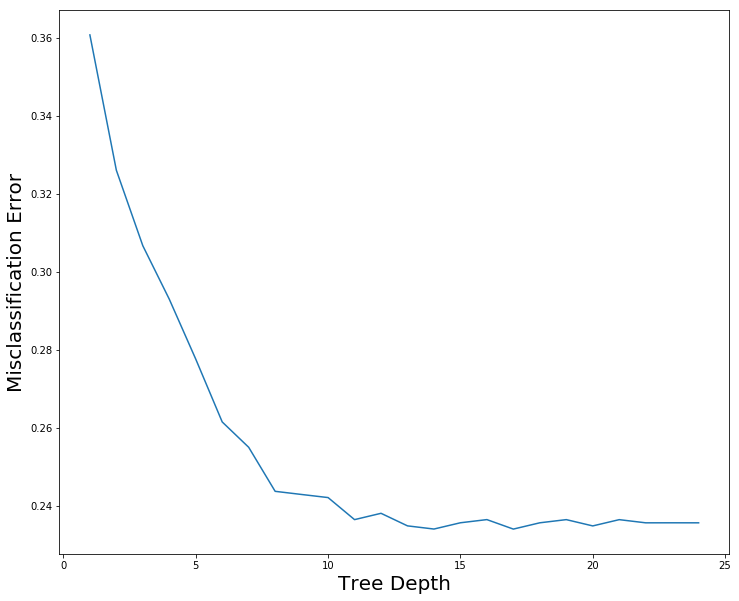

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=17, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

Accuracy (f1 micro) on test set:  0.743879472693
F1 micro on test set:  0.743879472693
F1 macro on test set:  0.743674929721

Confusion Matrix: 
[[205  85]
 [ 51 190]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.80      0.71      0.75       290
          1       0.69      0.79      0.74       241

avg / total       0.75      0.74      0.74       531



In [47]:
################################################ Feature set 2 ###############################################################
# find optimal depth and generate model
optimal_depth = chooseOptimalTreeDepth(rf_classifier, X_train, y_train)

# generate the model with the selected paramters plus the optimal depth and do the model fitting
rf_optimal = rf_classifier.set_params(max_depth = optimal_depth)
print rf_optimal
rf_optimal.fit(X_train, y_train)

# predict the response on test set
y_pred = rf_optimal.predict(X_test)

# get metrics
rf_acc_2b = getClfMetrics(y_test, y_pred)


In [48]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects_binary.iloc[:, 0:num_feature_set3_no_subjects_binary])
y = np.array(df_feature3_no_subjects_binary['Discomfort'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_estimators' : [10, 100, 1000],
              'criterion' : ['entropy', 'gini'],
              'min_samples_split' : [2, 10, 20, 30], 
              'class_weight' : ['balanced', 'balanced_subsample']}
scorer = 'f1_micro'
clf = RandomForestClassifier(n_estimators = 10, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
rf_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 30, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced'}


The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  0.669842800944 



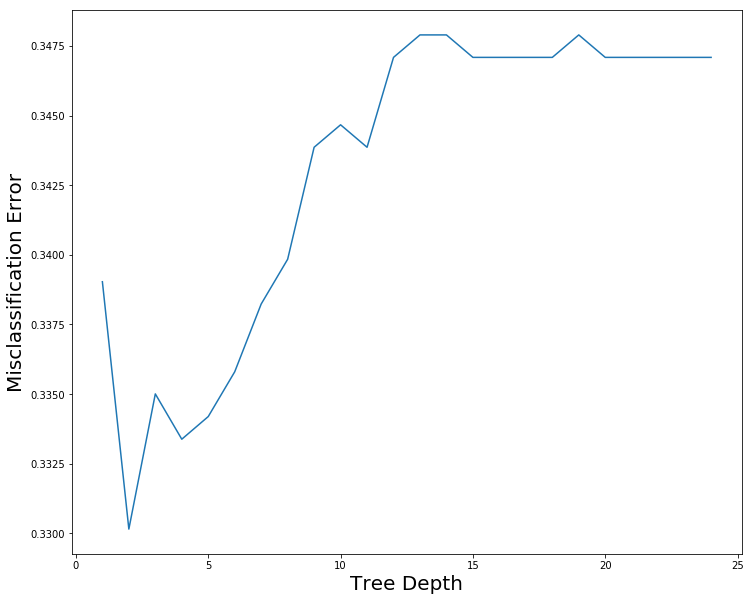

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=2, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

Accuracy (f1 micro) on test set:  0.664783427495
F1 micro on test set:  0.664783427495
F1 macro on test set:  0.659360223734

Confusion Matrix: 
[[210  80]
 [ 98 143]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.68      0.72      0.70       290
          1       0.64      0.59      0.62       241

avg / total       0.66      0.66      0.66       531



In [49]:
################################################ Feature set 3 ###############################################################
# find optimal depth and generate model
optimal_depth = chooseOptimalTreeDepth(rf_classifier, X_train, y_train)

# generate the model with the selected paramters plus the optimal depth and do the model fitting
rf_optimal = rf_classifier.set_params(max_depth = optimal_depth)
print rf_optimal
rf_optimal.fit(X_train, y_train)

# predict the response on test set
y_pred = rf_optimal.predict(X_test)

# get metrics
rf_acc_3b = getClfMetrics(y_test, y_pred)


### KNN

In [50]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects_binary.iloc[:, 0:num_feature_set1_no_subjects_binary])
y = np.array(df_feature1_no_subjects_binary['Discomfort'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_neighbors' : [3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
              'weights' : ['uniform', 'distance'], 
              'metric' : ['seuclidean'], 'algorithm' : ['brute']}
scorer = 'f1_micro'
clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
knn_classifier.fit(X_train, y_train)
print "\n"
print knn_classifier

# predict the response
y_pred = knn_classifier.predict(X_test)

# evaluate accuracy
knn_acc_1b = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 7, 'metric': 'seuclidean', 'weights': 'distance', 'algorithm': 'brute'}


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

Accuracy (f1 micro) on test set:  0.768361581921
F1 micro on test set:  0.768361581921
F1 macro on test set:  0.767715709322

Confusion Matrix: 
[[218  72]
 [ 51 190]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.81      0.75      0.78       290
          1       0.73      0.79      0.76       241

avg / total       0.77      0.77      0.77       531



In [51]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects_binary.iloc[:, 0:num_feature_set2_no_subjects_binary])
y = np.array(df_feature2_no_subjects_binary['Discomfort'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_neighbors' : [3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
              'weights' : ['uniform', 'distance'], 
              'metric' : ['seuclidean'], 'algorithm' : ['brute']}
scorer = 'f1_micro'
clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
knn_classifier.fit(X_train, y_train)
print "\n"
print knn_classifier

# predict the response
y_pred = knn_classifier.predict(X_test)

# evaluate accuracy
knn_acc_2b = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 7, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Accuracy (f1 micro) on test set:  0.708097928437
F1 micro on test set:  0.708097928437
F1 macro on test set:  0.706896244725

Confusion Matrix: 
[[205  85]
 [ 70 171]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.75      0.71      0.73       290
          1       0.67      0.71      0.69       241

avg / total       0.71      0.71      0.71       531



In [52]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects_binary.iloc[:, 0:num_feature_set3_no_subjects_binary])
y = np.array(df_feature3_no_subjects_binary['Discomfort'])

# split into train and test
test_size_percentage = 0.3 

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = {'n_neighbors' : [3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
              'weights' : ['uniform', 'distance'], 
              'metric' : ['seuclidean'], 'algorithm' : ['brute']}
scorer = 'f1_micro'
clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
knn_classifier.fit(X_train, y_train)
print "\n"
print knn_classifier

# predict the response
y_pred = knn_classifier.predict(X_test)

# evaluate accuracy
knn_acc_3b = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 15, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='seuclidean',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

Accuracy (f1 micro) on test set:  0.636534839925
F1 micro on test set:  0.636534839925
F1 macro on test set:  0.625784613362

Confusion Matrix: 
[[214  76]
 [117 124]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.65      0.74      0.69       290
          1       0.62      0.51      0.56       241

avg / total       0.63      0.64      0.63       531



### SVM

In [53]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects_binary.iloc[:, 0:num_feature_set1_no_subjects_binary])
y = np.array(df_feature1_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = [{'C' : [1, 10, 100, 1000],
               'kernel' : ['linear'], 
               'class_weight' : ['balanced']},
              {'C' : [1, 10, 100, 1000], 
               'kernel' : ['rbf'], 
               'gamma' : [0.1, 0.01, 0.001, 0.0001], 
               'class_weight' : ['balanced']}]
clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
scorer = 'f1_micro'
svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
svm_classifier.fit(X_train, y_train)
print "\n"
print svm_classifier

# predict the response
y_pred = svm_classifier.predict(X_test)

# evaluate accuracy
svm_acc_1b = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 100, 'gamma': 0.1, 'class_weight': 'balanced'}


SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=100, shrinking=True,
  tol=0.001, verbose=False)

Accuracy (f1 micro) on test set:  0.741996233522
F1 micro on test set:  0.741996233522
F1 macro on test set:  0.741992573336

Confusion Matrix: 
[[198  92]
 [ 45 196]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.81      0.68      0.74       290
          1       0.68      0.81      0.74       241

avg / total       0.75      0.74      0.74       531



In [54]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects_binary.iloc[:, 0:num_feature_set2_no_subjects_binary])
y = np.array(df_feature2_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = [{'C' : [1, 10, 100, 1000],
               'kernel' : ['linear'], 
               'class_weight' : ['balanced']},
              {'C' : [1, 10, 100, 1000], 
               'kernel' : ['rbf'], 
               'gamma' : [0.1, 0.01, 0.001, 0.0001], 
               'class_weight' : ['balanced']}]
clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
scorer = 'f1_micro'
svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
svm_classifier.fit(X_train, y_train)
print "\n"
print svm_classifier

# predict the response
y_pred = svm_classifier.predict(X_test)

# evaluate accuracy
svm_acc_2b = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 100, 'gamma': 0.1, 'class_weight': 'balanced'}


SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=100, shrinking=True,
  tol=0.001, verbose=False)

Accuracy (f1 micro) on test set:  0.687382297552
F1 micro on test set:  0.687382297552
F1 macro on test set:  0.680667458845

Confusion Matrix: 
[[221  69]
 [ 97 144]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.69      0.76      0.73       290
          1       0.68      0.60      0.63       241

avg / total       0.69      0.69      0.68       531



In [55]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects_binary.iloc[:, 0:num_feature_set3_no_subjects_binary])
y = np.array(df_feature3_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set (train_vectors)
# X_test = test set (test_vectors)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

parameters = [{'C' : [1, 10, 100, 1000],
               'kernel' : ['linear'], 
               'class_weight' : ['balanced']},
              {'C' : [1, 10, 100, 1000], 
               'kernel' : ['rbf'], 
               'gamma' : [0.1, 0.01, 0.001, 0.0001], 
               'class_weight' : ['balanced']}]
clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
scorer = 'f1_micro'
svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

# fitting the model
svm_classifier.fit(X_train, y_train)
print "\n"
print svm_classifier

# predict the response
y_pred = svm_classifier.predict(X_test)

# evaluate accuracy
svm_acc_3b = getClfMetrics(y_test, y_pred)


Number of folds: 10
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 100, 'gamma': 0.01, 'class_weight': 'balanced'}


SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=100, shrinking=True,
  tol=0.001, verbose=False)

Accuracy (f1 micro) on test set:  0.661016949153
F1 micro on test set:  0.661016949153
F1 macro on test set:  0.656483611271

Confusion Matrix: 
[[206  84]
 [ 96 145]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.68      0.71      0.70       290
          1       0.63      0.60      0.62       241

avg / total       0.66      0.66      0.66       531



### Naives Bayes

In [56]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects_binary.iloc[:, 0:num_feature_set1_no_subjects_binary])
y = np.array(df_feature1_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# instantiate learning model
nb_classifier = GaussianNB() # TODO get priors?

# k-fold cross validation
scores = cross_val_score(nb_classifier, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

# fitting the model
nb_classifier.fit(X_train, y_train)
print "\n"
print nb_classifier

# predict the response
y_pred = nb_classifier.predict(X_test)

# Metrics
nb_acc_1b = getClfMetrics(y_test, y_pred)


Expected accuracy (f1 micro) based on Cross-Validation:  0.609403252033


GaussianNB(priors=None)

Accuracy (f1 micro) on test set:  0.612052730697
F1 micro on test set:  0.612052730697
F1 macro on test set:  0.611323516871

Confusion Matrix: 
[[174 116]
 [ 90 151]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.66      0.60      0.63       290
          1       0.57      0.63      0.59       241

avg / total       0.62      0.61      0.61       531



In [57]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects_binary.iloc[:, 0:num_feature_set2_no_subjects_binary])
y = np.array(df_feature2_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# instantiate learning model
nb_classifier = GaussianNB() # TODO get priors?

# k-fold cross validation
scores = cross_val_score(nb_classifier, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

# fitting the model
nb_classifier.fit(X_train, y_train)
print "\n"
print nb_classifier

# predict the response
y_pred = nb_classifier.predict(X_test)

# Metrics
nb_acc_2b = getClfMetrics(y_test, y_pred)


Expected accuracy (f1 micro) based on Cross-Validation:  0.658584841332


GaussianNB(priors=None)

Accuracy (f1 micro) on test set:  0.640301318267
F1 micro on test set:  0.640301318267
F1 macro on test set:  0.633564205118

Confusion Matrix: 
[[206  84]
 [107 134]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.66      0.71      0.68       290
          1       0.61      0.56      0.58       241

avg / total       0.64      0.64      0.64       531



In [58]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects_binary.iloc[:, 0:num_feature_set3_no_subjects_binary])
y = np.array(df_feature3_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# instantiate learning model
nb_classifier = GaussianNB() # TODO get priors?

# k-fold cross validation
scores = cross_val_score(nb_classifier, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

# fitting the model
nb_classifier.fit(X_train, y_train)
print "\n"
print nb_classifier

# predict the response
y_pred = nb_classifier.predict(X_test)

# Metrics
nb_acc_3b = getClfMetrics(y_test, y_pred)


Expected accuracy (f1 micro) based on Cross-Validation:  0.657733018621


GaussianNB(priors=None)

Accuracy (f1 micro) on test set:  0.661016949153
F1 micro on test set:  0.661016949153
F1 macro on test set:  0.656483611271

Confusion Matrix: 
[[206  84]
 [ 96 145]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.68      0.71      0.70       290
          1       0.63      0.60      0.62       241

avg / total       0.66      0.66      0.66       531



### MLP

In [59]:
################################################ Feature set 1 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature1_no_subjects_binary.iloc[:, 0:num_feature_set1_no_subjects_binary])
y = np.array(df_feature1_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# TODO: keras

# MLP is sensitive to feature scaling. 
mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                    activation = 'tanh', 
                    solver = 'lbfgs', 
                    alpha = 0.001, 
                    learning_rate_init = 0.001, # only used with solver adam or sgd
                    max_iter = 300,
                    verbose = True,
                    random_state = 100)

# model learned
print mlp

# k-fold cross validation
scores = cross_val_score(mlp, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "\nExpected accuracy (f1 micro) based on Cross-Validation: ", scores.mean(), "\n"

# fitting the model
mlp.fit(X_train, y_train)

# predict the response
y_pred = mlp.predict(X_test)

# Metrics
mlp_acc_1b = getClfMetrics(y_test, y_pred)


MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=100,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

Expected accuracy (f1 micro) based on Cross-Validation:  0.745682769473 


Accuracy (f1 micro) on test set:  0.713747645951
F1 micro on test set:  0.713747645951
F1 macro on test set:  0.713111724059

Confusion Matrix: 
[[202  88]
 [ 64 177]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.76      0.70      0.73       290
          1       0.67      0.73      0.70       241

avg / total       0.72      0.71      0.71       531



In [60]:
################################################ Feature set 2 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature2_no_subjects_binary.iloc[:, 0:num_feature_set2_no_subjects_binary])
y = np.array(df_feature2_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# TODO: keras

# MLP is sensitive to feature scaling. 
mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                    activation = 'tanh', 
                    solver = 'lbfgs', 
                    alpha = 0.001, 
                    learning_rate_init = 0.001, # only used with solver adam or sgd
                    max_iter = 300,
                    verbose = True,
                    random_state = 100)

# model learned
print mlp

# k-fold cross validation
scores = cross_val_score(mlp, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "\nExpected accuracy (f1 micro) based on Cross-Validation: ", scores.mean(), "\n"

# fitting the model
mlp.fit(X_train, y_train)

# predict the response
y_pred = mlp.predict(X_test)

# Metrics
mlp_acc_2b = getClfMetrics(y_test, y_pred)

MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=100,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

Expected accuracy (f1 micro) based on Cross-Validation:  0.711876212956 


Accuracy (f1 micro) on test set:  0.709981167608
F1 micro on test set:  0.709981167608
F1 macro on test set:  0.70769109783

Confusion Matrix: 
[[212  78]
 [ 76 165]]

Classification Metrics: 
             precision    recall  f1-score   support

          0       0.74      0.73      0.73       290
          1       0.68      0.68      0.68       241

avg / total       0.71      0.71      0.71       531



In [1]:
################################################ Feature set 3 ###############################################################
# create design matrix X and target vector y
X = np.array(df_feature3_no_subjects_binary.iloc[:, 0:num_feature_set3_no_subjects_binary])
y = np.array(df_feature3_no_subjects_binary['Discomfort'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

# split into train and test
test_size_percentage = 0.3

# X_train = train + cv set
# X_test = test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

# TODO: keras

# MLP is sensitive to feature scaling. 
mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                    activation = 'tanh', 
                    solver = 'lbfgs', 
                    alpha = 0.001, 
                    learning_rate_init = 0.001, # only used with solver adam or sgd
                    max_iter = 300,
                    verbose = True,
                    random_state = 100)

# model learned
print mlp

# k-fold cross validation
scores = cross_val_score(mlp, X_train, y_train, cv = DEFAULT_K, scoring = 'accuracy') # accuracy here is f1 micro
print "\nExpected accuracy (f1 micro) based on Cross-Validation: ", scores.mean(), "\n"

# fitting the model
mlp.fit(X_train, y_train)

# predict the response
y_pred = mlp.predict(X_test)

# Metrics
mlp_acc_3b = getClfMetrics(y_test, y_pred)


NameError: name 'np' is not defined

### Results

Metric: F1-score micro
Data Split: 30% Test, 70% Train


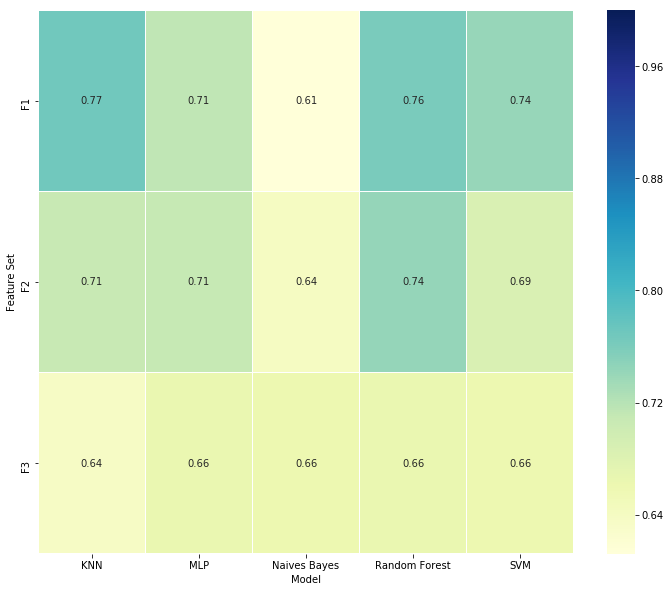

Target Labels:  [1 0]
Feature Set 1:  ['Temperature (Fahrenheit)', 'MinuteCalories', 'SkinTemperature', 'ClothingInsulation', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']
Feature Set 2:  ['Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']
Feature Set 3:  ['Temperature (Fahrenheit)']


In [62]:
# comparing base model
base_model_acc = getClfMetrics(y_test, base_model_pred)

# heatmap library
import seaborn as sns

experiment_acc_both_features_binary = pd.DataFrame([['Random Forest', 'F1', rf_acc_1b], 
                                                    ['KNN', 'F1', knn_acc_1b],
                                                    ['SVM', 'F1', svm_acc_1b],
                                                    ['Naives Bayes', 'F1', nb_acc_1b],
                                                    ['MLP', 'F1', mlp_acc_1b],
                                                    ['Random Forest', 'F2', rf_acc_2b], 
                                                    ['KNN', 'F2', knn_acc_2b],
                                                    ['SVM', 'F2', svm_acc_2b],
                                                    ['Naives Bayes', 'F2', nb_acc_2b],
                                                    ['MLP', 'F2', mlp_acc_2b],
                                                    ['Random Forest', 'F3', rf_acc_3b], 
                                                    ['KNN', 'F3', knn_acc_3b],
                                                    ['SVM', 'F3', svm_acc_3b],
                                                    ['Naives Bayes', 'F3', nb_acc_3b],
                                                    ['MLP', 'F3', mlp_acc_3b]],
                                                      columns = ['Model', 'Feature Set', 'Accuracy'])

# plot heatmap
print "Metric: F1-score micro"
print "Data Split: 30% Test, 70% Train"
experiment_acc_both_features_binary = experiment_acc_both_features_binary.pivot("Feature Set", "Model", "Accuracy")
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(experiment_acc_both_features_binary, linewidths = 0.5, annot = True, vmax = 1, cmap = "YlGnBu")
plt.show()

print "Target Labels: ", df_feature1_no_subjects_binary['Discomfort'].unique()
print "Feature Set 1: ", feature_set1_no_subjects_binary
print "Feature Set 2: ", feature_set2_no_subjects_binary
print "Feature Set 3: ", feature_set3_no_subjects_binary


## Aggregated Results (one model for all)

Metric: F1-score micro
Data Split: 30% Test, 70% Train


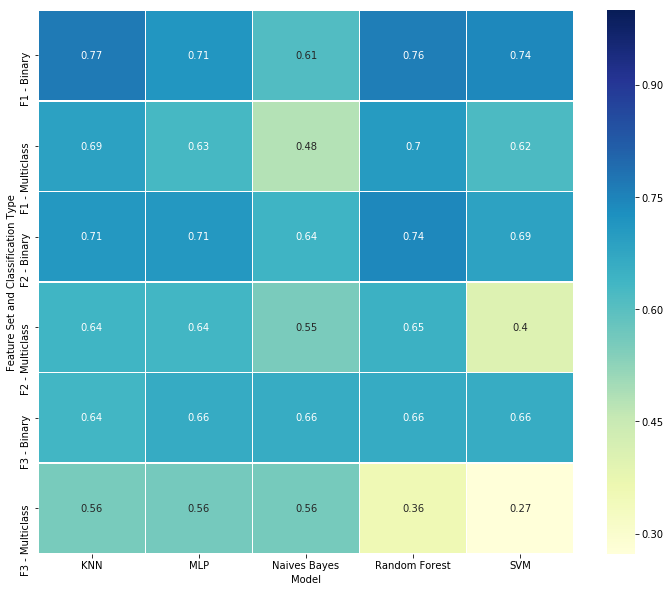

Target Labels Multiclass:  [-1 -2  0  1  2]
Target Labels Binary:  [1 0]
Feature Set 1:  ['Temperature (Fahrenheit)', 'MinuteCalories', 'SkinTemperature', 'ClothingInsulation', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']
Feature Set 2:  ['Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']
Feature Set 3:  ['Temperature (Fahrenheit)']


In [63]:
# heatmap library
import seaborn as sns

experiment_acc_all_participants = pd.DataFrame([['Random Forest', 'F1 - Multiclass', rf_acc_1], 
                                                ['KNN', 'F1 - Multiclass', knn_acc_1],
                                                ['SVM', 'F1 - Multiclass', svm_acc_1],
                                                ['Naives Bayes', 'F1 - Multiclass', nb_acc_1],
                                                ['MLP', 'F1 - Multiclass', mlp_acc_1],
                                                ['Random Forest', 'F2 - Multiclass', rf_acc_2], 
                                                ['KNN', 'F2 - Multiclass', knn_acc_2],
                                                ['SVM', 'F2 - Multiclass', svm_acc_2],
                                                ['Naives Bayes', 'F2 - Multiclass', nb_acc_2],
                                                ['MLP', 'F2 - Multiclass', mlp_acc_2],
                                                ['Random Forest', 'F3 - Multiclass', rf_acc_3], 
                                                ['KNN', 'F3 - Multiclass', knn_acc_3],
                                                ['SVM', 'F3 - Multiclass', svm_acc_3],
                                                ['Naives Bayes', 'F3 - Multiclass', nb_acc_3],
                                                ['MLP', 'F3 - Multiclass', mlp_acc_3],                                            
                                                ['Random Forest', 'F1 - Binary', rf_acc_1b], 
                                                ['KNN', 'F1 - Binary', knn_acc_1b],
                                                ['SVM', 'F1 - Binary', svm_acc_1b],
                                                ['Naives Bayes', 'F1 - Binary', nb_acc_1b],
                                                ['MLP', 'F1 - Binary', mlp_acc_1b],
                                                ['Random Forest', 'F2 - Binary', rf_acc_2b], 
                                                ['KNN', 'F2 - Binary', knn_acc_2b],
                                                ['SVM', 'F2 - Binary', svm_acc_2b],
                                                ['Naives Bayes', 'F2 - Binary', nb_acc_2b],
                                                ['MLP', 'F2 - Binary', mlp_acc_2b],
                                                ['Random Forest', 'F3 - Binary', rf_acc_3b], 
                                                ['KNN', 'F3 - Binary', knn_acc_3b],
                                                ['SVM', 'F3 - Binary', svm_acc_3b],
                                                ['Naives Bayes', 'F3 - Binary', nb_acc_3b],
                                                ['MLP', 'F3 - Binary', mlp_acc_3b]                                                                                  ],
                                                columns = ['Model', 'Feature Set and Classification Type', 'Accuracy'])

# plot heatmap
print "Metric: F1-score micro"
print "Data Split: 30% Test, 70% Train"
experiment_acc_all_participants = experiment_acc_all_participants.pivot("Feature Set and Classification Type", "Model", "Accuracy")
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(experiment_acc_all_participants, linewidths = 0.5, annot = True, vmax = 1, cmap = "YlGnBu")
plt.show()

print "Target Labels Multiclass: ", df_feature1_no_subjects['Discrete Thermal Comfort_TA'].unique()
print "Target Labels Binary: ", df_feature1_no_subjects_binary['Discomfort'].unique()
print "Feature Set 1: ", feature_set1_no_subjects_binary
print "Feature Set 2: ", feature_set2_no_subjects_binary
print "Feature Set 3: ", feature_set3_no_subjects_binary


## Personalized models, Multi-class classification problem

In [11]:
# Get instance with only one target class
def findUnitaryClass(y):
    classCounter = Counter(y)
#     print classCounter
    numLeastCommonClass = min(classCounter.values())
    if numLeastCommonClass == 1:
        label = classCounter.keys()[classCounter.values().index(numLeastCommonClass)]
    else:
        label = -10
    return label

In [12]:
# Models in mind: Random Forest, KNN, SVM, Naive Bayes, and MLP
################################################ Feature set 1 ###############################################################
df_feature1_subjects = df_feature1.copy()
    
# list of participants numbers in the dataset
participant_list = set(df_feature1_subjects['Participant_No'])
# print participant_list

# since the activity feature is heavily imbalaced
del df_feature1_subjects['Activity']

# based on item 3 (table of contents), Gsr will not be used
del df_feature1_subjects['Gsr']

# new set of features without the substracted features
feature_set1_subjects = list(df_feature1_subjects)[:-1]
num_feature_set1_subjects = len(feature_set1_subjects) - 1 # we do not use Participant_No as a feature
print "Feature Set 1 (with subjects): ", feature_set1_subjects
print "Number of features in this set: ", num_feature_set1_subjects, "\n"

################################################ Feature set 2 ###############################################################
df_feature2_subjects = df_feature2.copy()

# new set of features without the substracted features
feature_set2_subjects = list(df_feature2_subjects)[:-1]
num_feature_set2_subjects = len(feature_set2_subjects) - 1 # we do not use Participant_No as a feature
print "Feature Set 2 (with subjects): ", feature_set2_subjects
print "Number of features in this set: ", num_feature_set2_subjects, "\n"

################################################ Feature set 3 ###############################################################
df_feature3_subjects = df_feature3.copy()

# new set of features without the substracted features
feature_set3_subjects = list(df_feature3_subjects)[:-1]
num_feature_set3_subjects = len(feature_set3_subjects) - 1 # we do not use Participant_No as a feature
print "Feature Set 3 (with subjects): ", feature_set3_subjects
print "Number of features in this set: ", num_feature_set3_subjects, "\n"


Feature Set 1 (with subjects):  ['Participant_No', 'Temperature (Fahrenheit)', 'MinuteCalories', 'SkinTemperature', 'ClothingInsulation', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']
Number of features in this set:  8 

Feature Set 2 (with subjects):  ['Participant_No', 'Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']
Number of features in this set:  3 

Feature Set 3 (with subjects):  ['Participant_No', 'Temperature (Fahrenheit)']
Number of features in this set:  1 



### Random Forest

In [13]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_rf_classifier = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects[df_feature1_subjects['Participant_No'] == participant]    
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature

    # check if there are classes with only one sample
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])
    
    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
        
    parameters = {'n_estimators' : [5, 10, 100, 1000],
                  'criterion' : ['entropy', 'gini'],
                  'min_samples_split' : [2, 10, 20, 30], 
                  'class_weight' : ['balanced', 'balanced_subsample']}
    scorer = 'f1_micro'
    clf = RandomForestClassifier(n_estimators = 5, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
    dict_rf_classifier[participant] = selectModelParameters(X_train, y_train, clf, parameters, scorer)
    print "\n"
    

Starting Participant 1
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


Starti

Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 1000, 'criterion': 'gini', 'class_weight': 'balanced'}


Starting Participant 66
Number of folds: 6
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 67
Participant 67 has label 2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 68
Number of folds: 8
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 70
Number of folds: 5
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 1000, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 71
Number of folds: 2
Best para

In [14]:
################################################ Feature set 1 ###############################################################
# print dict_rf_classifier
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_rf_classifier_acc1 = {}

# for each participant, find optimal tree depth
for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects[df_feature1_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])
    
    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
        
     # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
   # find optimal depth and generate model
    optimal_depth = chooseOptimalTreeDepth(dict_rf_classifier[participant], X_train, y_train, plot = False)

    # generate the model with the selected parameters plus the optimal depth and do the model fitting
    rf_optimal = dict_rf_classifier[participant].set_params(max_depth = optimal_depth)
#     print rf_optimal
    rf_optimal.fit(X_train, y_train)

    # predict the response on test set
    y_pred = rf_optimal.predict(X_test)

    # Metrics
    rf_acc_subject = accuracy_score(y_test, y_pred)
    dict_rf_classifier_acc1[participant] = rf_acc_subject # store the accuracy of the respective participant
    print "\n"
    

Starting Participant 1
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  1.0 



Starting Participant 2
Participant 2 has label -2 as unitary class.

The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.888888888888889 



Starting Participant 4
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.7500000000000001 



Starting Participant 5
The optimal depth is:  4 

Expected accuracy (f1 micro) based on Cross-Validation:  0.7566137566137566 



Starting Participant 6
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.8638888888888889 



Starting Participant 7
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.8166666666666667 



Starting Participant 8
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.8333333333333334 



Starting Participant 11
The optimal depth is:  1 

Expected 

In [15]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_rf_classifier = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects[df_feature2_subjects['Participant_No'] == participant]    
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature

    # check if there are classes with only one sample
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
        
    parameters = {'n_estimators' : [5, 10, 100, 1000],
                  'criterion' : ['entropy', 'gini'],
                  'min_samples_split' : [2, 10, 20, 30], 
                  'class_weight' : ['balanced', 'balanced_subsample']}
    scorer = 'f1_micro'
    clf = RandomForestClassifier(n_estimators = 5, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
    dict_rf_classifier[participant] = selectModelParameters(X_train, y_train, clf, parameters, scorer)
    print "\n"
    

Starting Participant 1
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting

Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 66
Number of folds: 6
Best parameters set found on development set:
{'min_samples_split': 20, 'n_estimators': 1000, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 67
Participant 67 has label 2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


Starting Participant 68
Number of folds: 8
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 70
Number of folds: 5
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


Starting Participant 71
Number o

In [ ]:
################################################ Feature set 2 ###############################################################
# print dict_rf_classifier
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_rf_classifier_acc2 = {}

# for each participant, find optimal tree depth
for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects[df_feature2_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])
    
    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
        
     # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
   # find optimal depth and generate model
    optimal_depth = chooseOptimalTreeDepth(dict_rf_classifier[participant], X_train, y_train, plot = False)

    # generate the model with the selected parameters plus the optimal depth and do the model fitting
    rf_optimal = dict_rf_classifier[participant].set_params(max_depth = optimal_depth)
#     print rf_optimal
    rf_optimal.fit(X_train, y_train)

    # predict the response on test set
    y_pred = rf_optimal.predict(X_test)

    # Metrics
    rf_acc_subject = accuracy_score(y_test, y_pred)
    dict_rf_classifier_acc2[participant] = rf_acc_subject # store the accuracy of the respective participant
    print "\n"
    

Starting Participant 1
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  1.0 



Starting Participant 2
Participant 2 has label -2 as unitary class.

The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.888888888888889 



Starting Participant 4
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.79 



Starting Participant 5
The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  0.7195767195767195 



Starting Participant 6
The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  0.9 



Starting Participant 7
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.8266666666666668 



Starting Participant 8
The optimal depth is:  4 

Expected accuracy (f1 micro) based on Cross-Validation:  0.8333333333333333 



Starting Participant 11
The optimal depth is:  2 

Expected accuracy (f1 micro) based on 

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_rf_classifier = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects[df_feature3_subjects['Participant_No'] == participant]    
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature

    # check if there are classes with only one sample
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
        
    parameters = {'n_estimators' : [5, 10, 100, 1000],
                  'criterion' : ['entropy', 'gini'],
                  'min_samples_split' : [2, 10, 20, 30], 
                  'class_weight' : ['balanced', 'balanced_subsample']}
    scorer = 'f1_micro'
    clf = RandomForestClassifier(n_estimators = 5, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
    dict_rf_classifier[participant] = selectModelParameters(X_train, y_train, clf, parameters, scorer)
    print "\n"
    

Starting Participant 1
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting

Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 66
Number of folds: 6
Best parameters set found on development set:
{'min_samples_split': 20, 'n_estimators': 1000, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 67
Participant 67 has label 2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


Starting Participant 68
Number of folds: 8
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 70
Number of folds: 5
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


Starting Participant 71
Number o

In [ ]:
################################################ Feature set 3 ###############################################################
# print dict_rf_classifier
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_rf_classifier_acc3 = {}

# for each participant, find optimal tree depth
for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects[df_feature3_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])
    
    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
        
     # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
   # find optimal depth and generate model
    optimal_depth = chooseOptimalTreeDepth(dict_rf_classifier[participant], X_train, y_train, plot = False)

    # generate the model with the selected parameters plus the optimal depth and do the model fitting
    rf_optimal = dict_rf_classifier[participant].set_params(max_depth = optimal_depth)
#     print rf_optimal
    rf_optimal.fit(X_train, y_train)

    # predict the response on test set
    y_pred = rf_optimal.predict(X_test)

    # Metrics
    rf_acc_subject = accuracy_score(y_test, y_pred)
    dict_rf_classifier_acc3[participant] = rf_acc_subject # store the accuracy of the respective participant
    print "\n"
    

Starting Participant 1
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  1.0 



Starting Participant 2
Participant 2 has label -2 as unitary class.

The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.888888888888889 



Starting Participant 4
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.79 



Starting Participant 5
The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  0.7195767195767195 



Starting Participant 6
The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  0.9 



Starting Participant 7
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.8266666666666668 



Starting Participant 8
The optimal depth is:  4 

Expected accuracy (f1 micro) based on Cross-Validation:  0.8333333333333333 



Starting Participant 11
The optimal depth is:  2 

Expected accuracy (f1 micro) based on 

### KNN

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_knn_classifier_acc1 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects[df_feature1_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    # split into train and test
    test_size_percentage = 0.3 

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue

    possible_neighbors = range(1, min(4, len(X_train)))
    
    parameters = {'n_neighbors' : possible_neighbors, #[3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
                  'weights' : ['uniform', 'distance'], 
                  'metric' : ['seuclidean'], 'algorithm' : ['brute']}
    scorer = 'f1_micro'
    clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
    knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    knn_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = knn_classifier.predict(X_test)

    # metrics
    knn_acc_participant = accuracy_score(y_test, y_pred)
    dict_knn_classifier_acc1[participant] = knn_acc_participant
    print "\n"
    

Starting Participant 1
Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3


/home/matias/TCS/local/lib/python2.7/site-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


Best parameters set found on development set:
{'n_neighbors': 3, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'n_neighbors': 3, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 7
Number of folds: 5
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'distance', 'algorithm': 'brute'}


Starting Participant 8
Number of folds: 5
Best parameters set found on development set:
{'n_neighbors': 3, 'metric': 'seuclidean', 'weights': 'uniform', 'al

Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 73
Participant 73 has label -2 as unitary class.

Number of folds: 2
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'distance', 'algorithm': 'brute'}


Starting Participant 74
Participant 74 only had one fold.

Starting Participant 75
Number of folds: 2
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 76
Number of folds: 2
Best parameters set found on development set:
{'n_neighbors': 3, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 77
Participant 77 has label -2 as unitary class.

Number of folds: 9
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'distance', 'algorithm': 'brute'}


In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_knn_classifier_acc2 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects[df_feature2_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    # split into train and test
    test_size_percentage = 0.3 

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue

    possible_neighbors = range(1, min(4, len(X_train)))
    
    parameters = {'n_neighbors' : possible_neighbors, #[3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
                  'weights' : ['uniform', 'distance'], 
                  'metric' : ['seuclidean'], 'algorithm' : ['brute']}
    scorer = 'f1_micro'
    clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
    knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    knn_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = knn_classifier.predict(X_test)

    # metrics
    knn_acc_participant = accuracy_score(y_test, y_pred)
    dict_knn_classifier_acc2[participant] = knn_acc_participant
    print "\n"
    

Starting Participant 1
Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'n_neighbors': 2, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'n_neighbors': 2, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 7
Number of folds: 5
Best parameters set found 

Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 70
Number of folds: 5
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 71
Number of folds: 2
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 72
Number of folds: 6
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 73
Participant 73 has label -2 as unitary class.

Number of folds: 2
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'distance', 'algorithm': 'brute'}


Starting Participant 74
Participant 74 only had one fold.

Starting Participant 75
Number of folds: 2
Bes

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_knn_classifier_acc3 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects[df_feature3_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    # split into train and test
    test_size_percentage = 0.3 

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue

    possible_neighbors = range(1, min(4, len(X_train)))
    
    parameters = {'n_neighbors' : possible_neighbors, #[3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
                  'weights' : ['uniform', 'distance'], 
                  'metric' : ['seuclidean'], 'algorithm' : ['brute']}
    scorer = 'f1_micro'
    clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
    knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    knn_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = knn_classifier.predict(X_test)

    # metrics
    knn_acc_participant = accuracy_score(y_test, y_pred)
    dict_knn_classifier_acc3[participant] = knn_acc_participant
    print "\n"
    

Starting Participant 1
Number of folds: 10
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'n_neighbors': 2, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'n_neighbors': 3, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'n_neighbors': 2, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 7
Number of folds: 5
Best parameters set found 

Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 68
Number of folds: 8
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 70
Number of folds: 5
Best parameters set found on development set:
{'n_neighbors': 3, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 71
Number of folds: 2
Best parameters set found on development set:
{'n_neighbors': 1, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 72
Number of folds: 6
Best parameters set found on development set:
{'n_neighbors': 3, 'metric': 'seuclidean', 'weights': 'uniform', 'algorithm': 'brute'}


Starting Participant 73
Participant 73 has label -2 as unitary class.

Number of folds: 2
Best parameters set found on development set:
{'n_neighbors': 2

### SVM

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_svm_classifier_acc1 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects[df_feature1_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    elif len(np.unique(y_train)) == 1:
        print "Participant " + str(participant) + " only had one class.\n"
        continue
    
    parameters = [{'C' : [1, 10, 100, 1000],
                   'kernel' : ['linear'], 
                   'class_weight' : ['balanced']},
                  {'C' : [1, 10, 100, 1000], 
                   'kernel' : ['rbf'], 
                   'gamma' : [0.1, 0.01, 0.001, 0.0001], 
                   'class_weight' : ['balanced']}]
    clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
    scorer = 'f1_micro'
    svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    svm_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = svm_classifier.predict(X_test)

    # metrics
    svm_acc_participant = accuracy_score(y_test, y_pred)
    dict_svm_classifier_acc1[participant] = svm_acc_participant
    print "\n"
    

Starting Participant 1
Participant 1 only had one class.

Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1000, 'class_weight': 'balanced'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 100, 'gamma': 0.1, 'class_weight': 'balanced'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 7
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 8
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Best parameters set found on development set:
{'kernel': 'linear', 'C': 100, 'class_weight': 'balanced'}


Starting Participant 77
Participant 77 has label -2 as unitary class.

Number of folds: 9
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 78
Participant 78 has label -2 as unitary class.

Number of folds: 2
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 79
Participant 79 only had one fold.

Starting Participant 80
Participant 80 only had one fold.



In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_svm_classifier_acc2 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects[df_feature2_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    elif len(np.unique(y_train)) == 1:
        print "Participant " + str(participant) + " only had one class.\n"
        continue
    
    parameters = [{'C' : [1, 10, 100, 1000],
                   'kernel' : ['linear'], 
                   'class_weight' : ['balanced']},
                  {'C' : [1, 10, 100, 1000], 
                   'kernel' : ['rbf'], 
                   'gamma' : [0.1, 0.01, 0.001, 0.0001], 
                   'class_weight' : ['balanced']}]
    clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
    scorer = 'f1_micro'
    svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    svm_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = svm_classifier.predict(X_test)

    # metrics
    svm_acc_participant = accuracy_score(y_test, y_pred)
    dict_svm_classifier_acc2[participant] = svm_acc_participant
    print "\n"
    

Starting Participant 1
Participant 1 only had one class.

Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'kernel': 'linear', 'C': 100, 'class_weight': 'balanced'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'kernel': 'rbf', 'C': 1, 'gamma': 0.1, 'class_weight': 'balanced'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1000, 'class_weight': 'balanced'}


Starting Participant 7
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 100, 'class_weight': 'balanced'}


Starting Participant 8
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'

Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 77
Participant 77 has label -2 as unitary class.

Number of folds: 9
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 78
Participant 78 has label -2 as unitary class.

Number of folds: 2
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 79
Participant 79 only had one fold.

Starting Participant 80
Participant 80 only had one fold.



In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_svm_classifier_acc3 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects[df_feature3_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    elif len(np.unique(y_train)) == 1:
        print "Participant " + str(participant) + " only had one class.\n"
        continue
    
    parameters = [{'C' : [1, 10, 100, 1000],
                   'kernel' : ['linear'], 
                   'class_weight' : ['balanced']},
                  {'C' : [1, 10, 100, 1000], 
                   'kernel' : ['rbf'], 
                   'gamma' : [0.1, 0.01, 0.001, 0.0001], 
                   'class_weight' : ['balanced']}]
    clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
    scorer = 'f1_micro'
    svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    svm_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = svm_classifier.predict(X_test)

    # metrics
    svm_acc_participant = accuracy_score(y_test, y_pred)
    dict_svm_classifier_acc3[participant] = svm_acc_participant
    print "\n"
    

Starting Participant 1
Participant 1 only had one class.

Starting Participant 2
Participant 2 has label -2 as unitary class.

Number of folds: 3
Best parameters set found on development set:
{'kernel': 'linear', 'C': 100, 'class_weight': 'balanced'}


Starting Participant 4
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 5
Number of folds: 3
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1000, 'class_weight': 'balanced'}


Starting Participant 6
Number of folds: 6
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1000, 'class_weight': 'balanced'}


Starting Participant 7
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 100, 'class_weight': 'balanced'}


Starting Participant 8
Number of folds: 5
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Star

Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 77
Participant 77 has label -2 as unitary class.

Number of folds: 9
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 78
Participant 78 has label -2 as unitary class.

Number of folds: 2
Best parameters set found on development set:
{'kernel': 'linear', 'C': 1, 'class_weight': 'balanced'}


Starting Participant 79
Participant 79 only had one fold.

Starting Participant 80
Participant 80 only had one fold.



### Naive Bayes

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_nb_classifier_acc1 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects[df_feature1_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # instantiate learning model
    nb_classifier = GaussianNB() # TODO get priors?

    # k-fold cross validation
    scores = cross_val_score(nb_classifier, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    nb_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = nb_classifier.predict(X_test)
    
    # metrics
    nb_acc_participant = accuracy_score(y_test, y_pred)
    dict_nb_classifier_acc1[participant] = nb_acc_participant
    print "\n"
    

Starting Participant 1
Expected accuracy (f1 micro) based on Cross-Validation:  1.0


Starting Participant 2
Participant 2 has label -2 as unitary class.

Expected accuracy (f1 micro) based on Cross-Validation:  0.7666666666666666


Starting Participant 4
Expected accuracy (f1 micro) based on Cross-Validation:  0.76


Starting Participant 5
Expected accuracy (f1 micro) based on Cross-Validation:  0.8042328042328042


Starting Participant 6
Expected accuracy (f1 micro) based on Cross-Validation:  0.7972222222222222


Starting Participant 7
Expected accuracy (f1 micro) based on Cross-Validation:  0.72


Starting Participant 8
Expected accuracy (f1 micro) based on Cross-Validation:  0.9166666666666667


Starting Participant 11
Expected accuracy (f1 micro) based on Cross-Validation:  0.5125


Starting Participant 12
Expected accuracy (f1 micro) based on Cross-Validation:  0.675


Starting Participant 14
Expected accuracy (f1 micro) based on Cross-Validation:  0.5499999999999999


Starting 

In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_nb_classifier_acc2 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects[df_feature2_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # instantiate learning model
    nb_classifier = GaussianNB() # TODO get priors?

    # k-fold cross validation
    scores = cross_val_score(nb_classifier, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    nb_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = nb_classifier.predict(X_test)
    
    # metrics
    nb_acc_participant = accuracy_score(y_test, y_pred)
    dict_nb_classifier_acc2[participant] = nb_acc_participant
    print "\n"
    

Starting Participant 1
Expected accuracy (f1 micro) based on Cross-Validation:  1.0


Starting Participant 2
Participant 2 has label -2 as unitary class.

Expected accuracy (f1 micro) based on Cross-Validation:  0.8333333333333334


Starting Participant 4
Expected accuracy (f1 micro) based on Cross-Validation:  0.76


Starting Participant 5
Expected accuracy (f1 micro) based on Cross-Validation:  0.671957671957672


Starting Participant 6
Expected accuracy (f1 micro) based on Cross-Validation:  0.8305555555555556


Starting Participant 7
Expected accuracy (f1 micro) based on Cross-Validation:  0.7999999999999999


Starting Participant 8
Expected accuracy (f1 micro) based on Cross-Validation:  0.7833333333333333


Starting Participant 11
Expected accuracy (f1 micro) based on Cross-Validation:  0.5125


Starting Participant 12
Expected accuracy (f1 micro) based on Cross-Validation:  0.6875


Starting Participant 14
Expected accuracy (f1 micro) based on Cross-Validation:  0.59166666666666

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_nb_classifier_acc3 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects[df_feature3_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # instantiate learning model
    nb_classifier = GaussianNB() # TODO get priors?

    # k-fold cross validation
    scores = cross_val_score(nb_classifier, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    nb_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = nb_classifier.predict(X_test)
    
    # metrics
    nb_acc_participant = accuracy_score(y_test, y_pred)
    dict_nb_classifier_acc3[participant] = nb_acc_participant
    print "\n"
    

Starting Participant 1
Expected accuracy (f1 micro) based on Cross-Validation:  1.0


Starting Participant 2
Participant 2 has label -2 as unitary class.

Expected accuracy (f1 micro) based on Cross-Validation:  0.8333333333333334


Starting Participant 4
Expected accuracy (f1 micro) based on Cross-Validation:  0.76


Starting Participant 5
Expected accuracy (f1 micro) based on Cross-Validation:  0.671957671957672


Starting Participant 6
Expected accuracy (f1 micro) based on Cross-Validation:  0.8305555555555556


Starting Participant 7
Expected accuracy (f1 micro) based on Cross-Validation:  0.7999999999999999


Starting Participant 8
Expected accuracy (f1 micro) based on Cross-Validation:  0.7833333333333333


Starting Participant 11
Expected accuracy (f1 micro) based on Cross-Validation:  0.5125


Starting Participant 12
Expected accuracy (f1 micro) based on Cross-Validation:  0.6875


Starting Participant 14
Expected accuracy (f1 micro) based on Cross-Validation:  0.59166666666666

### MLP

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_mlp_classifier_acc1 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects[df_feature1_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class."

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])
    
    # MLP is sensitive to feature scaling. 
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # Using sklearn library
    mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                        activation = 'tanh', 
                        solver = 'lbfgs', 
                        alpha = 0.001, 
                        learning_rate_init = 0.001, # only used with solver adam or sgd
                        max_iter = 300,
                        verbose = True,
                        random_state = 100)

    # k-fold cross validation
    scores = cross_val_score(mlp, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    mlp.fit(X_train, y_train)

    # predict the response
    y_pred = mlp.predict(X_test)

    # evaluate accuracy
    mlp_acc_participant = accuracy_score(y_test, y_pred)
    dict_mlp_classifier_acc1[participant] = mlp_acc_participant
    print "\n"
    

Starting Participant 1
Expected accuracy (f1 micro) based on Cross-Validation:  1.0


Starting Participant 2
Participant 2 has label -2 as unitary class.
Expected accuracy (f1 micro) based on Cross-Validation:  0.7111111111111111


Starting Participant 4
Expected accuracy (f1 micro) based on Cross-Validation:  0.76


Starting Participant 5
Expected accuracy (f1 micro) based on Cross-Validation:  0.7566137566137566


Starting Participant 6
Expected accuracy (f1 micro) based on Cross-Validation:  0.7555555555555555


Starting Participant 7
Expected accuracy (f1 micro) based on Cross-Validation:  0.6033333333333333


Starting Participant 8
Expected accuracy (f1 micro) based on Cross-Validation:  0.85


Starting Participant 11
Expected accuracy (f1 micro) based on Cross-Validation:  0.35


Starting Participant 12
Expected accuracy (f1 micro) based on Cross-Validation:  0.525


Starting Participant 14
Expected accuracy (f1 micro) based on Cross-Validation:  0.39999999999999997


Starting Pa

In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_mlp_classifier_acc2 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects[df_feature2_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class."

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])
    
    # MLP is sensitive to feature scaling. 
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # Using sklearn library
    mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                        activation = 'tanh', 
                        solver = 'lbfgs', 
                        alpha = 0.001, 
                        learning_rate_init = 0.001, # only used with solver adam or sgd
                        max_iter = 300,
                        verbose = True,
                        random_state = 100)

    # k-fold cross validation
    scores = cross_val_score(mlp, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    mlp.fit(X_train, y_train)

    # predict the response
    y_pred = mlp.predict(X_test)

    # evaluate accuracy
    mlp_acc_participant = accuracy_score(y_test, y_pred)
    dict_mlp_classifier_acc2[participant] = mlp_acc_participant
    print "\n"
    

Starting Participant 1
Expected accuracy (f1 micro) based on Cross-Validation:  1.0


Starting Participant 2
Participant 2 has label -2 as unitary class.
Expected accuracy (f1 micro) based on Cross-Validation:  0.7666666666666666


Starting Participant 4
Expected accuracy (f1 micro) based on Cross-Validation:  0.7100000000000001


Starting Participant 5
Expected accuracy (f1 micro) based on Cross-Validation:  0.5608465608465608


Starting Participant 6
Expected accuracy (f1 micro) based on Cross-Validation:  0.8722222222222223


Starting Participant 7
Expected accuracy (f1 micro) based on Cross-Validation:  0.71


Starting Participant 8
Expected accuracy (f1 micro) based on Cross-Validation:  0.8333333333333333


Starting Participant 11
Expected accuracy (f1 micro) based on Cross-Validation:  0.3875


Starting Participant 12
Expected accuracy (f1 micro) based on Cross-Validation:  0.6875


Starting Participant 14
Expected accuracy (f1 micro) based on Cross-Validation:  0.51666666666666

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_mlp_classifier_acc3 = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects[df_feature3_subjects['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discrete Thermal Comfort_TA'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discrete Thermal Comfort_TA'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class."

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects])
    y = np.array(df_participant['Discrete Thermal Comfort_TA'])
    
    # MLP is sensitive to feature scaling. 
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # Using sklearn library
    mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                        activation = 'tanh', 
                        solver = 'lbfgs', 
                        alpha = 0.001, 
                        learning_rate_init = 0.001, # only used with solver adam or sgd
                        max_iter = 300,
                        verbose = True,
                        random_state = 100)

    # k-fold cross validation
    scores = cross_val_score(mlp, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    mlp.fit(X_train, y_train)

    # predict the response
    y_pred = mlp.predict(X_test)

    # evaluate accuracy
    mlp_acc_participant = accuracy_score(y_test, y_pred)
    dict_mlp_classifier_acc3[participant] = mlp_acc_participant
    print "\n"
    

Starting Participant 1
Expected accuracy (f1 micro) based on Cross-Validation:  1.0


Starting Participant 2
Participant 2 has label -2 as unitary class.
Expected accuracy (f1 micro) based on Cross-Validation:  0.7666666666666666


Starting Participant 4
Expected accuracy (f1 micro) based on Cross-Validation:  0.7100000000000001


Starting Participant 5
Expected accuracy (f1 micro) based on Cross-Validation:  0.5608465608465608


Starting Participant 6
Expected accuracy (f1 micro) based on Cross-Validation:  0.8722222222222223


Starting Participant 7
Expected accuracy (f1 micro) based on Cross-Validation:  0.6699999999999999


Starting Participant 8
Expected accuracy (f1 micro) based on Cross-Validation:  0.8333333333333333


Starting Participant 11
Expected accuracy (f1 micro) based on Cross-Validation:  0.3875


Starting Participant 12
Expected accuracy (f1 micro) based on Cross-Validation:  0.6875


Starting Participant 14
Expected accuracy (f1 micro) based on Cross-Validation:  0.

### Results

Target Labels:  [-1 -2  0  1  2]
Feature Set 1:  ['Participant_No', 'Temperature (Fahrenheit)', 'MinuteCalories', 'SkinTemperature', 'ClothingInsulation', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']
Feature Set 2:  ['Participant_No', 'Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']
Feature Set 3:  ['Participant_No', 'Temperature (Fahrenheit)'] 

Metric: F1-score micro
Data Split: 30% Test, 70% Train
Classification Model Random Forest


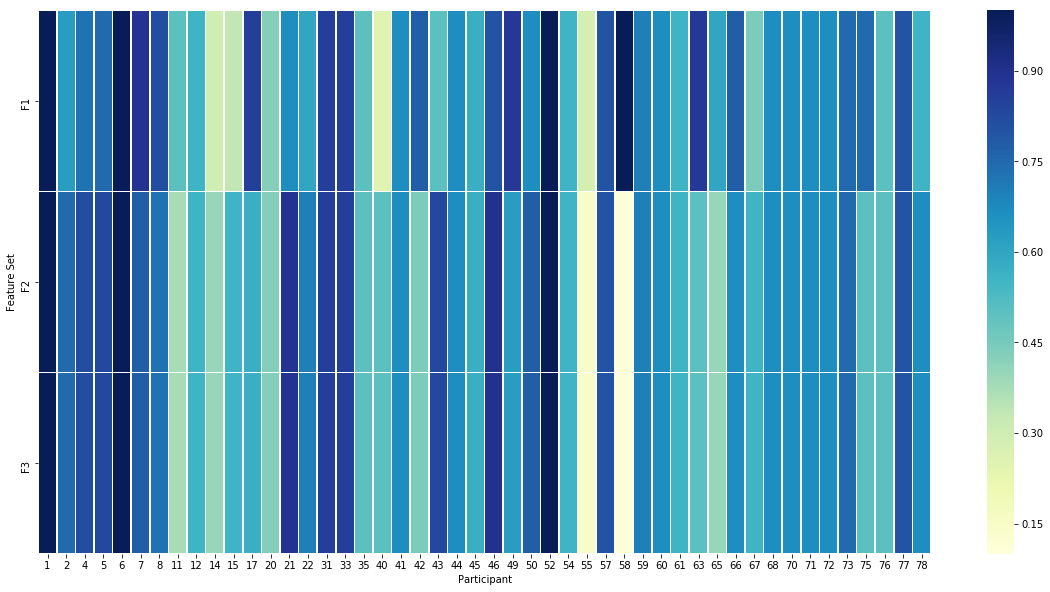

Classification Model KNN


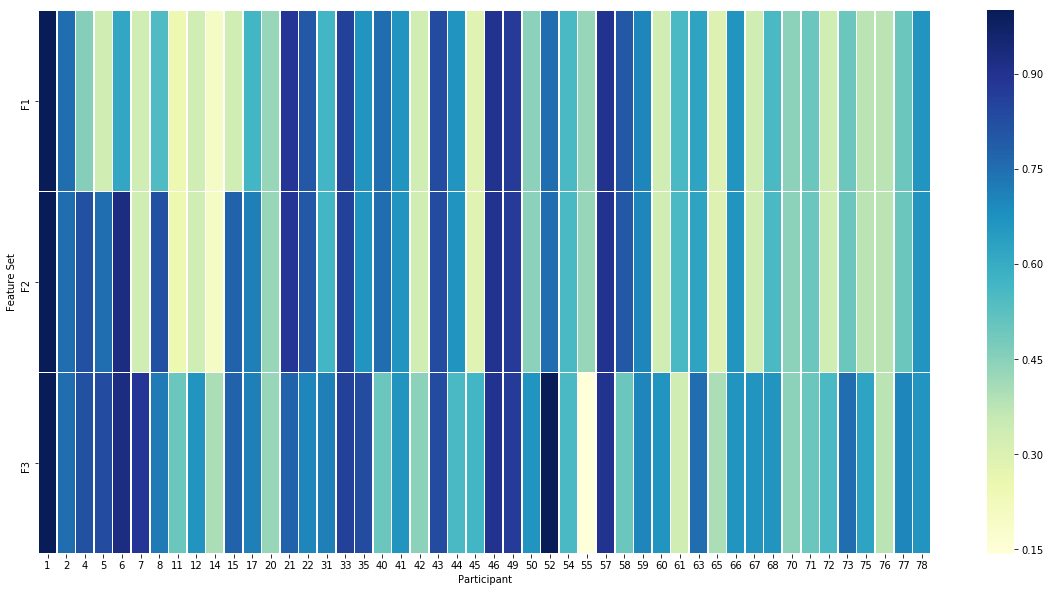

Classification Model SVM


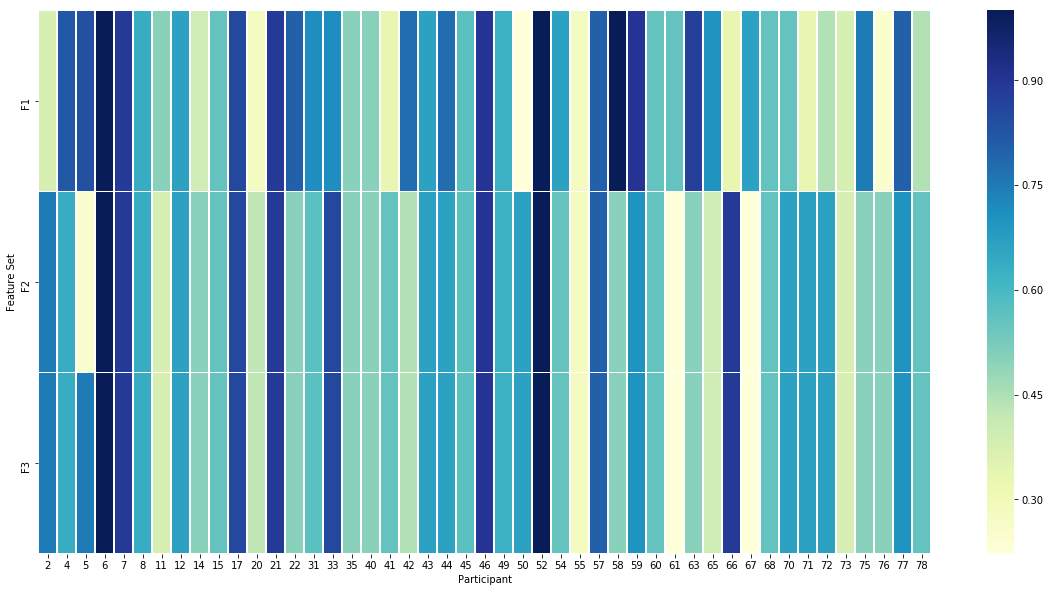

Classification Model Naive Bayes


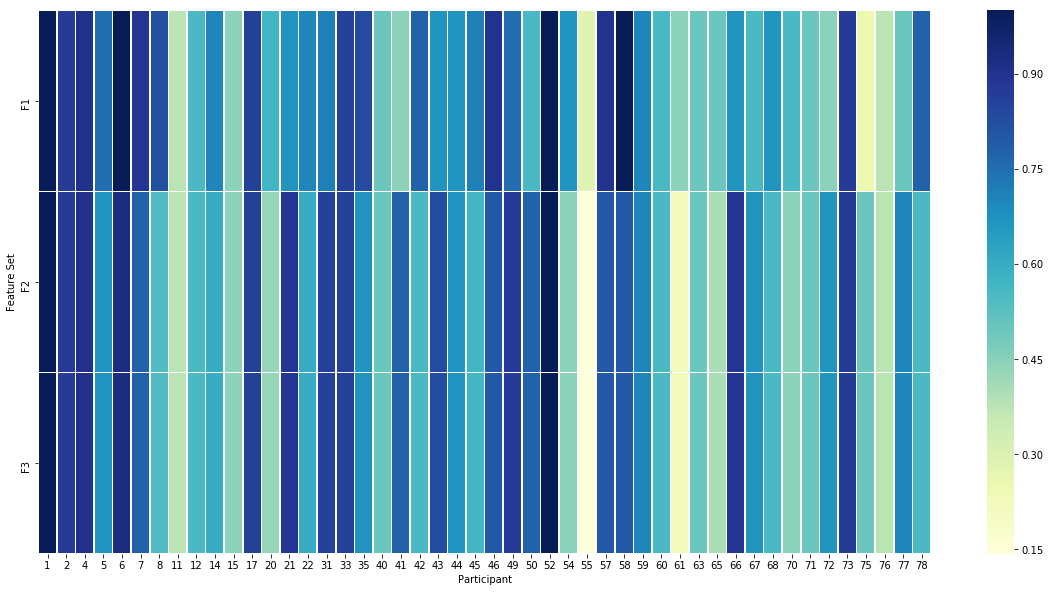

Classification Model MLP


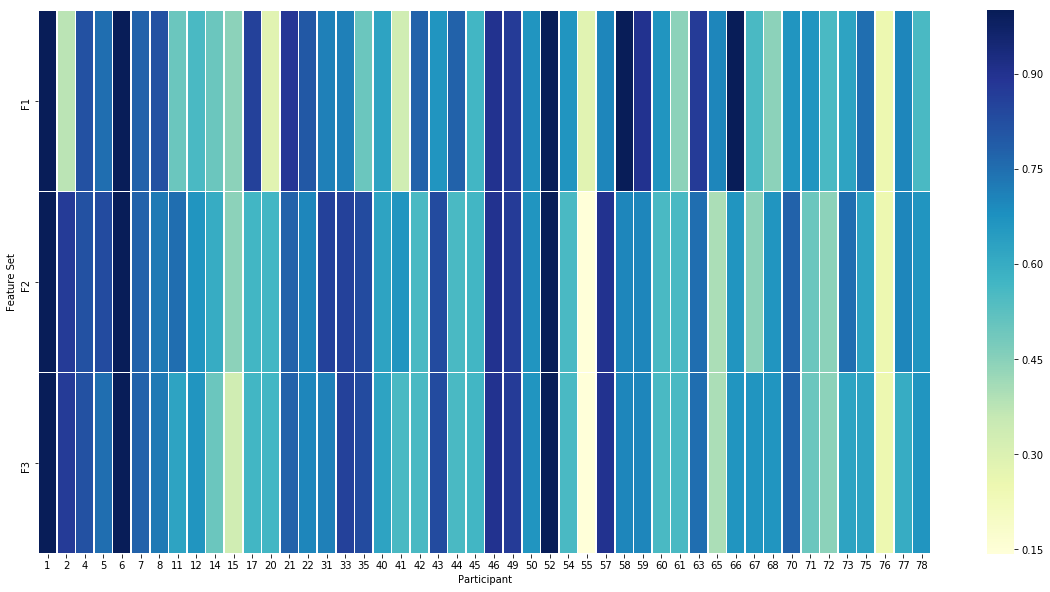

In [ ]:
# heatmap library
import seaborn as sns

print "Target Labels: ", df_feature1_subjects['Discrete Thermal Comfort_TA'].unique()
print "Feature Set 1: ", feature_set1_subjects
print "Feature Set 2: ", feature_set2_subjects
print "Feature Set 3: ", feature_set3_subjects, "\n"

# plot heatmap
print "Metric: F1-score micro"
print "Data Split: 30% Test, 70% Train"

# Random Forest
print "Classification Model Random Forest"
personalized_acc_all_features_set = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_rf_classifier_acc1.items():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_rf_classifier_acc2.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_rf_classifier_acc3.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set = personalized_acc_all_features_set.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# KNN
print "Classification Model KNN"
personalized_acc_all_features_set = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_knn_classifier_acc1.items():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_knn_classifier_acc2.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_knn_classifier_acc3.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set = personalized_acc_all_features_set.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# SVM
print "Classification Model SVM"
personalized_acc_all_features_set = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_svm_classifier_acc1.items():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_svm_classifier_acc2.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_svm_classifier_acc3.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set = personalized_acc_all_features_set.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# Naive Bayes
print "Classification Model Naive Bayes"
personalized_acc_all_features_set = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_nb_classifier_acc1.items():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_nb_classifier_acc2.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_nb_classifier_acc3.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set = personalized_acc_all_features_set.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# MLP
print "Classification Model MLP"
personalized_acc_all_features_set = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_mlp_classifier_acc1.items():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_mlp_classifier_acc2.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_mlp_classifier_acc3.iteritems():
    personalized_acc_all_features_set.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set = personalized_acc_all_features_set.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()


## Personalized models, Binary classification problem

In [ ]:
# Models in mind: Random Forest, KNN, SM, Naive Bayes, and MLP
df_feature1_binary = df_feature1.copy()
df_feature2_binary = df_feature2.copy()
df_feature3_binary = df_feature3.copy()

df_feature1_binary['Discomfort'] = df_feature1_binary['Discrete Thermal Comfort_TA'].map(lambda x: 1 if x != 0 else 0)
df_feature2_binary['Discomfort'] = df_feature2_binary['Discrete Thermal Comfort_TA'].map(lambda x: 1 if x != 0 else 0)
df_feature3_binary['Discomfort'] = df_feature3_binary['Discrete Thermal Comfort_TA'].map(lambda x: 1 if x != 0 else 0)

################################################ Feature set 1 ###############################################################
df_feature1_subjects_binary = df_feature1_binary.copy()

# since the activity feature is heavily imbalaced
del df_feature1_subjects_binary['Activity']

# based on item 3 (table of contents), Gsr will not be used
del df_feature1_subjects_binary['Gsr']

# drop the multiclass target and keep the binary
del df_feature1_subjects_binary['Discrete Thermal Comfort_TA']

# new set of features without the substrawcted features
feature_set1_subjects_binary = list(df_feature1_subjects_binary)[:-1]
num_feature_set1_subjects_binary = len(feature_set1_subjects_binary) - 1 # we do not use Participant_No as a feature
print "Feature Set 1 (with subjects): ", feature_set1_subjects_binary
print "Number of features in this set: ", num_feature_set1_subjects_binary, "\n"

################################################ Feature set 2 ###############################################################
df_feature2_subjects_binary = df_feature2_binary.copy()

# drop the multiclass target and keep the binary
del df_feature2_subjects_binary['Discrete Thermal Comfort_TA']

# new set of features without the substracted features
feature_set2_subjects_binary = list(df_feature2_subjects_binary)[:-1]
num_feature_set2_subjects_binary = len(feature_set2_subjects_binary) - 1 # we do not use Participant_No as a feature
print "Feature Set 2 (with subjects): ", feature_set2_subjects_binary
print "Number of features in this set: ", num_feature_set2_subjects_binary, "\n"

################################################ Feature set 3 ###############################################################
df_feature3_subjects_binary = df_feature3_binary.copy()

# drop the multiclass target and keep the binary
del df_feature3_subjects_binary['Discrete Thermal Comfort_TA']

# new set of features without the substracted features
feature_set3_subjects_binary = list(df_feature3_subjects_binary)[:-1]
num_feature_set3_subjects_binary = len(feature_set3_subjects_binary) - 1 # we do not use Participant_No as a feature
print "Feature Set 3 (with subjects): ", feature_set3_subjects_binary
print "Number of features in this set: ", num_feature_set3_subjects_binary, "\n"

Feature Set 1 (with subjects):  ['Participant_No', 'Temperature (Fahrenheit)', 'MinuteCalories', 'SkinTemperature', 'ClothingInsulation', 'Height(cm)', 'Shoulder Circumference(cm)', 'Weight(lbs)', 'Gender']
Number of features in this set:  8 

Feature Set 2 (with subjects):  ['Participant_No', 'Temperature (Fahrenheit)', 'Height(cm)', 'Shoulder Circumference(cm)']
Number of features in this set:  3 

Feature Set 3 (with subjects):  ['Participant_No', 'Temperature (Fahrenheit)']
Number of features in this set:  1 



### Random Forest

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_rf_classifier = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects_binary[df_feature1_subjects_binary['Participant_No'] == participant]    
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature

    # check if there are classes with only one sample
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects_binary])
    y = np.array(df_participant['Discomfort'])
    
    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
        
    parameters = {'n_estimators' : [5, 10, 100, 1000],
                  'criterion' : ['entropy', 'gini'],
                  'min_samples_split' : [2, 10, 20, 30], 
                  'class_weight' : ['balanced', 'balanced_subsample']}
    scorer = 'f1_micro'
    clf = RandomForestClassifier(n_estimators = 5, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
    dict_rf_classifier[participant] = selectModelParameters(X_train, y_train, clf, parameters, scorer)
    print "\n"
    

Starting Participant 1
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 2
Number of folds: 4
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 1000, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


Starting Participant 4
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}


Starting Participant 5
Number of folds: 9
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 6
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 7
Number of folds: 7
B

Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 61
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 62
Number of folds: 6
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 63
Number of folds: 8
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 64
Number of folds: 6
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 65
Number of folds: 6
Best parameters set found on development set:
{'min_sam

In [ ]:
################################################ Feature set 1 ###############################################################
# print dict_rf_classifier
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_rf_classifier_acc1b = {}

# for each participant, find optimal tree depth
for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects_binary[df_feature1_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects_binary])
    y = np.array(df_participant['Discomfort'])
    
    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
        
     # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
   # find optimal depth and generate model
    optimal_depth = chooseOptimalTreeDepth(dict_rf_classifier[participant], X_train, y_train, plot = False)

    # generate the model with the selected parameters plus the optimal depth and do the model fitting
    rf_optimal = dict_rf_classifier[participant].set_params(max_depth = optimal_depth)
#     print rf_optimal
    rf_optimal.fit(X_train, y_train)

    # predict the response on test set
    y_pred = rf_optimal.predict(X_test)

    # Metrics
    rf_acc_subject = accuracy_score(y_test, y_pred)
    dict_rf_classifier_acc1b[participant] = rf_acc_subject # store the accuracy of the respective participant
    print "\n"
    

Starting Participant 1
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  1.0 



Starting Participant 2
The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  0.9 



Starting Participant 4
The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  1.0 



Starting Participant 5
The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  0.7777777777777778 



Starting Participant 6
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  0.9666666666666666 



Starting Participant 7
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  1.0 



Starting Participant 8
The optimal depth is:  1 

Expected accuracy (f1 micro) based on Cross-Validation:  1.0 



Starting Participant 11
The optimal depth is:  2 

Expected accuracy (f1 micro) based on Cross-Validation:  0.9444444444444445 



Starting Participant 12
The optima

In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_rf_classifier = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects_binary[df_feature2_subjects_binary['Participant_No'] == participant]    
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature

    # check if there are classes with only one sample
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
        
    parameters = {'n_estimators' : [5, 10, 100, 1000],
                  'criterion' : ['entropy', 'gini'],
                  'min_samples_split' : [2, 10, 20, 30], 
                  'class_weight' : ['balanced', 'balanced_subsample']}
    scorer = 'f1_micro'
    clf = RandomForestClassifier(n_estimators = 5, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
    dict_rf_classifier[participant] = selectModelParameters(X_train, y_train, clf, parameters, scorer)
    print "\n"
    

Starting Participant 1
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 2
Number of folds: 4
Best parameters set found on development set:
{'min_samples_split': 10, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 4
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 5
Number of folds: 9
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 6
Number of folds: 10
Best parameters set found on development set:
{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}


Starting Participant 7
Number of folds: 7
Best parameters set fo

In [ ]:
################################################ Feature set 2 ###############################################################
# print dict_rf_classifier
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_rf_classifier_acc2b = {}

# for each participant, find optimal tree depth
for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects_binary[df_feature2_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects_binary])
    y = np.array(df_participant['Discomfort'])
    
    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
        
     # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
   # find optimal depth and generate model
    optimal_depth = chooseOptimalTreeDepth(dict_rf_classifier[participant], X_train, y_train, plot = False)

    # generate the model with the selected parameters plus the optimal depth and do the model fitting
    rf_optimal = dict_rf_classifier[participant].set_params(max_depth = optimal_depth)
#     print rf_optimal
    rf_optimal.fit(X_train, y_train)

    # predict the response on test set
    y_pred = rf_optimal.predict(X_test)

    # Metrics
    rf_acc_subject = accuracy_score(y_test, y_pred)
    dict_rf_classifier_acc2b[participant] = rf_acc_subject # store the accuracy of the respective participant
    print "\n"
    

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_rf_classifier = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects_binary[df_feature3_subjects_binary['Participant_No'] == participant]    
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature

    # check if there are classes with only one sample
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
        
    parameters = {'n_estimators' : [5, 10, 100, 1000],
                  'criterion' : ['entropy', 'gini'],
                  'min_samples_split' : [2, 10, 20, 30], 
                  'class_weight' : ['balanced', 'balanced_subsample']}
    scorer = 'f1_micro'
    clf = RandomForestClassifier(n_estimators = 5, min_samples_split = 2, class_weight = 'balanced', random_state = 100)
    dict_rf_classifier[participant] = selectModelParameters(X_train, y_train, clf, parameters, scorer)
    print "\n"
    

In [ ]:
################################################ Feature set 3 ###############################################################
# print dict_rf_classifier
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_rf_classifier_acc3b = {}

# for each participant, find optimal tree depth
for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects_binary[df_feature3_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects_binary])
    y = np.array(df_participant['Discomfort'])
    
    # split into train and test
    test_size_percentage = 0.3 
    
    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
        
     # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
   # find optimal depth and generate model
    optimal_depth = chooseOptimalTreeDepth(dict_rf_classifier[participant], X_train, y_train, plot = False)

    # generate the model with the selected parameters plus the optimal depth and do the model fitting
    rf_optimal = dict_rf_classifier[participant].set_params(max_depth = optimal_depth)
#     print rf_optimal
    rf_optimal.fit(X_train, y_train)

    # predict the response on test set
    y_pred = rf_optimal.predict(X_test)

    # Metrics
    rf_acc_subject = accuracy_score(y_test, y_pred)
    dict_rf_classifier_acc3b[participant] = rf_acc_subject # store the accuracy of the respective participant
    print "\n"
    

### KNN

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_knn_classifier_acc1b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects_binary[df_feature1_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    # split into train and test
    test_size_percentage = 0.3 

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue

    possible_neighbors = range(1, min(4, len(X_train)))
    
    parameters = {'n_neighbors' : possible_neighbors, #[3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
                  'weights' : ['uniform', 'distance'], 
                  'metric' : ['seuclidean'], 'algorithm' : ['brute']}
    scorer = 'f1_micro'
    clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
    knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    knn_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = knn_classifier.predict(X_test)

    # metrics
    knn_acc_participant = accuracy_score(y_test, y_pred)
    dict_knn_classifier_acc1b[participant] = knn_acc_participant
    print "\n"
    

In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_knn_classifier_acc2b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects_binary[df_feature2_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    # split into train and test
    test_size_percentage = 0.3 

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue

    possible_neighbors = range(1, min(4, len(X_train)))
    
    parameters = {'n_neighbors' : possible_neighbors, #[3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
                  'weights' : ['uniform', 'distance'], 
                  'metric' : ['seuclidean'], 'algorithm' : ['brute']}
    scorer = 'f1_micro'
    clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
    knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    knn_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = knn_classifier.predict(X_test)

    # metrics
    knn_acc_participant = accuracy_score(y_test, y_pred)
    dict_knn_classifier_acc2b[participant] = knn_acc_participant
    print "\n"
    

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier accuracy for each participant. The participant number will be used as key
dict_knn_classifier_acc3b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects_binary[df_feature3_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    # split into train and test
    test_size_percentage = 0.3 

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_percentage, random_state = 100, stratify = y)
    
    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue

    possible_neighbors = range(1, min(4, len(X_train)))
    
    parameters = {'n_neighbors' : possible_neighbors, #[3, 5, 7, 9, 10, 11, 12, 13, 14, 15], 
                  'weights' : ['uniform', 'distance'], 
                  'metric' : ['seuclidean'], 'algorithm' : ['brute']}
    scorer = 'f1_micro'
    clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'seuclidean', algorithm = 'brute')
    knn_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    knn_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = knn_classifier.predict(X_test)

    # metrics
    knn_acc_participant = accuracy_score(y_test, y_pred)
    dict_knn_classifier_acc3b[participant] = knn_acc_participant
    print "\n"
    

### SVM

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_svm_classifier_acc1b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects_binary[df_feature1_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    elif len(np.unique(y_train)) == 1:
        print "Participant " + str(participant) + " only had one class.\n"
        continue
    
    parameters = [{'C' : [1, 10, 100, 1000],
                   'kernel' : ['linear'], 
                   'class_weight' : ['balanced']},
                  {'C' : [1, 10, 100, 1000], 
                   'kernel' : ['rbf'], 
                   'gamma' : [0.1, 0.01, 0.001, 0.0001], 
                   'class_weight' : ['balanced']}]
    clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
    scorer = 'f1_micro'
    svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    svm_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = svm_classifier.predict(X_test)

    # metrics
    svm_acc_participant = accuracy_score(y_test, y_pred)
    dict_svm_classifier_acc1b[participant] = svm_acc_participant
    print "\n"
    

In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_svm_classifier_acc2b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects_binary[df_feature2_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    elif len(np.unique(y_train)) == 1:
        print "Participant " + str(participant) + " only had one class.\n"
        continue
    
    parameters = [{'C' : [1, 10, 100, 1000],
                   'kernel' : ['linear'], 
                   'class_weight' : ['balanced']},
                  {'C' : [1, 10, 100, 1000], 
                   'kernel' : ['rbf'], 
                   'gamma' : [0.1, 0.01, 0.001, 0.0001], 
                   'class_weight' : ['balanced']}]
    clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
    scorer = 'f1_micro'
    svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    svm_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = svm_classifier.predict(X_test)

    # metrics
    svm_acc_participant = accuracy_score(y_test, y_pred)
    dict_svm_classifier_acc2b[participant] = svm_acc_participant
    print "\n"
    

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_svm_classifier_acc3b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects_binary[df_feature3_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"
    
    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set (train_vectors)
    # X_test = test set (test_vectors)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    elif len(np.unique(y_train)) == 1:
        print "Participant " + str(participant) + " only had one class.\n"
        continue
    
    parameters = [{'C' : [1, 10, 100, 1000],
                   'kernel' : ['linear'], 
                   'class_weight' : ['balanced']},
                  {'C' : [1, 10, 100, 1000], 
                   'kernel' : ['rbf'], 
                   'gamma' : [0.1, 0.01, 0.001, 0.0001], 
                   'class_weight' : ['balanced']}]
    clf = SVC(C = 1, kernel = 'linear', class_weight = None, random_state = 100)
    scorer = 'f1_micro'
    svm_classifier = selectModelParameters(X_train, y_train, clf, parameters, scorer)

    # fitting the model
    svm_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = svm_classifier.predict(X_test)

    # metrics
    svm_acc_participant = accuracy_score(y_test, y_pred)
    dict_svm_classifier_acc3b[participant] = svm_acc_participant
    print "\n"
    

### Naive Bayes

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_nb_classifier_acc1b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects_binary[df_feature1_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # instantiate learning model
    nb_classifier = GaussianNB() # TODO get priors?

    # k-fold cross validation
    scores = cross_val_score(nb_classifier, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    nb_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = nb_classifier.predict(X_test)
    
    # metrics
    nb_acc_participant = accuracy_score(y_test, y_pred)
    dict_nb_classifier_acc1b[participant] = nb_acc_participant
    print "\n"
    

In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_nb_classifier_acc2b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects_binary[df_feature2_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # instantiate learning model
    nb_classifier = GaussianNB() # TODO get priors?

    # k-fold cross validation
    scores = cross_val_score(nb_classifier, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    nb_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = nb_classifier.predict(X_test)
    
    # metrics
    nb_acc_participant = accuracy_score(y_test, y_pred)
    dict_nb_classifier_acc2b[participant] = nb_acc_participant
    print "\n"
    

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_nb_classifier_acc3b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects_binary[df_feature3_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class.\n"

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects_binary])
    y = np.array(df_participant['Discomfort'])

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # instantiate learning model
    nb_classifier = GaussianNB() # TODO get priors?

    # k-fold cross validation
    scores = cross_val_score(nb_classifier, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    nb_classifier.fit(X_train, y_train)

    # predict the response
    y_pred = nb_classifier.predict(X_test)
    
    # metrics
    nb_acc_participant = accuracy_score(y_test, y_pred)
    dict_nb_classifier_acc3b[participant] = nb_acc_participant
    print "\n"
    

### MLP

In [ ]:
################################################ Feature set 1 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_mlp_classifier_acc1b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature1_subjects_binary[df_feature1_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class."

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set1_subjects_binary])
    y = np.array(df_participant['Discomfort'])
    
    # MLP is sensitive to feature scaling. 
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # Using sklearn library
    mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                        activation = 'tanh', 
                        solver = 'lbfgs', 
                        alpha = 0.001, 
                        learning_rate_init = 0.001, # only used with solver adam or sgd
                        max_iter = 300,
                        verbose = True,
                        random_state = 100)

    # k-fold cross validation
    scores = cross_val_score(mlp, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    mlp.fit(X_train, y_train)

    # predict the response
    y_pred = mlp.predict(X_test)

    # evaluate accuracy
    mlp_acc_participant = accuracy_score(y_test, y_pred)
    dict_mlp_classifier_acc1b[participant] = mlp_acc_participant
    print "\n"
    

In [ ]:
################################################ Feature set 2 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_mlp_classifier_acc2b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature2_subjects_binary[df_feature2_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class."

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set2_subjects_binary])
    y = np.array(df_participant['Discomfort'])
    
    # MLP is sensitive to feature scaling. 
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # Using sklearn library
    mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                        activation = 'tanh', 
                        solver = 'lbfgs', 
                        alpha = 0.001, 
                        learning_rate_init = 0.001, # only used with solver adam or sgd
                        max_iter = 300,
                        verbose = True,
                        random_state = 100)

    # k-fold cross validation
    scores = cross_val_score(mlp, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    mlp.fit(X_train, y_train)

    # predict the response
    y_pred = mlp.predict(X_test)

    # evaluate accuracy
    mlp_acc_participant = accuracy_score(y_test, y_pred)
    dict_mlp_classifier_acc2b[participant] = mlp_acc_participant
    print "\n"
    

In [ ]:
################################################ Feature set 3 ###############################################################
# dictionary that will hold the classifier for each participant. The participant number will be used as key
dict_mlp_classifier_acc3b = {}

for participant in participant_list:
    print "Starting Participant " + str(participant)
    
    df_participant = df_feature3_subjects_binary[df_feature3_subjects_binary['Participant_No'] == participant]
    del df_participant['Participant_No'] # do not use the Particiant_No as a feature
    
    # check if there are classes with only one instance
    label_to_remove = findUnitaryClass(df_participant['Discomfort'])
    if label_to_remove != -10: # value used when no unitary class was find
        df_participant = df_participant[df_participant['Discomfort'] != label_to_remove]
        print "Participant " + str(participant) + " has label " + str(label_to_remove) + " as unitary class."

    # create design matrix X and target vector y
    X = np.array(df_participant.iloc[:, 0:num_feature_set3_subjects_binary])
    y = np.array(df_participant['Discomfort'])
    
    # MLP is sensitive to feature scaling. 
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X) # TODO: does this take care of boolean variables?

    # split into train and test
    test_size_percentage = 0.3

    # X_train = train + cv set
    # X_test = test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size_percentage, random_state = 100, stratify = y)

    # ignore if only 1 fold is found
    if chooseK(y_train) == 1:
        print "Participant " + str(participant) + " only had one fold.\n"
        continue
    
    # Using sklearn library
    mlp = MLPClassifier(hidden_layer_sizes = (11,), # 1 hidden layer with 8 neurons
                        activation = 'tanh', 
                        solver = 'lbfgs', 
                        alpha = 0.001, 
                        learning_rate_init = 0.001, # only used with solver adam or sgd
                        max_iter = 300,
                        verbose = True,
                        random_state = 100)

    # k-fold cross validation
    scores = cross_val_score(mlp, X_train, y_train, cv = chooseK(y_train), scoring = 'accuracy') # accuracy here is f1 micro
    print "Expected accuracy (f1 micro) based on Cross-Validation: ", scores.mean()

    # fitting the model
    mlp.fit(X_train, y_train)

    # predict the response
    y_pred = mlp.predict(X_test)

    # evaluate accuracy
    mlp_acc_participant = accuracy_score(y_test, y_pred)
    dict_mlp_classifier_acc3b[participant] = mlp_acc_participant
    print "\n"
    

### Results

In [ ]:
# heatmap library
import seaborn as sns

print "Target Labels: ", df_feature1_subjects_binary['Discomfort'].unique()
print "Feature Set 1: ", feature_set1_subjects_binary
print "Feature Set 2: ", feature_set2_subjects_binary
print "Feature Set 3: ", feature_set3_subjects_binary, "\n"

# plot heatmap
print "Metric: F1-score micro"
print "Data Split: 30% Test, 70% Train"

# Random Forest
print "Classification Model Random Forest"
personalized_acc_all_features_set_binary = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_rf_classifier_acc1b.items():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_rf_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_rf_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set_binary = personalized_acc_all_features_set_binary.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_binary, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# KNN
print "Classification Model KNN"
personalized_acc_all_features_set_binary = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_knn_classifier_acc1b.items():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_knn_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_knn_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set_binary = personalized_acc_all_features_set_binary.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_binary, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# SVM
print "Classification Model SVM"
personalized_acc_all_features_set_binary = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_svm_classifier_acc1b.items():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_svm_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_svm_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set_binary = personalized_acc_all_features_set_binary.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_binary, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# Naive Bayes
print "Classification Model Naive Bayes"
personalized_acc_all_features_set_binary = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_nb_classifier_acc1b.items():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_nb_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_nb_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set_binary = personalized_acc_all_features_set_binary.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_binary, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# MLP
print "Classification Model MLP"
personalized_acc_all_features_set_binary = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_mlp_classifier_acc1b.items():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F1']
    index = index + 1
    
for key, value in dict_mlp_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F2']
    index = index + 1

for key, value in dict_mlp_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_binary.loc[index] = [key, value, 'F3']
    index = index + 1

personalized_acc_all_features_set_binary = personalized_acc_all_features_set_binary.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_binary, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()


## Aggregated Results (personalized models)

In [ ]:
# heatmap library
import seaborn as sns

print "Target Labels Multiclass: ", df_feature1_subjects['Discrete Thermal Comfort_TA'].unique()
print "Target Labels Binary: ", df_feature1_subjects_binary['Discomfort'].unique()
print "Feature Set 1: ", feature_set1_subjects_binary
print "Feature Set 2: ", feature_set2_subjects_binary
print "Feature Set 3: ", feature_set3_subjects_binary, "\n"

# plot heatmap
print "Metric: F1-score micro"
print "Data Split: 30% Test, 70% Train"

# Random Forest
print "Classification Model Random Forest"
personalized_acc_all_features_set_aggregated = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_rf_classifier_acc1.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Multiclass']
    index = index + 1

for key, value in dict_rf_classifier_acc1b.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Binary']
    index = index + 1
    
for key, value in dict_rf_classifier_acc2.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Multiclass']
    index = index + 1
    
for key, value in dict_rf_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Binary']
    index = index + 1

for key, value in dict_rf_classifier_acc3.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Multiclass']
    index = index + 1
    
for key, value in dict_rf_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Binary']
    index = index + 1

personalized_acc_all_features_set_aggregated = personalized_acc_all_features_set_aggregated.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_aggregated, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# KNN
print "Classification Model KNN"
personalized_acc_all_features_set_aggregated = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_knn_classifier_acc1.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Multiclass']
    index = index + 1

for key, value in dict_knn_classifier_acc1b.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Binary']
    index = index + 1
    
for key, value in dict_knn_classifier_acc2.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Multiclass']
    index = index + 1
    
for key, value in dict_knn_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Binary']
    index = index + 1

for key, value in dict_knn_classifier_acc3.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Multiclass']
    index = index + 1
    
for key, value in dict_knn_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Binary']
    index = index + 1

personalized_acc_all_features_set_aggregated = personalized_acc_all_features_set_aggregated.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_aggregated, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# SVM
print "Classification Model SVM"
personalized_acc_all_features_set_aggregated = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_svm_classifier_acc1.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Multiclass']
    index = index + 1

for key, value in dict_svm_classifier_acc1b.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Binary']
    index = index + 1

for key, value in dict_svm_classifier_acc2.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Multiclass']
    index = index + 1    

for key, value in dict_svm_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Binary']
    index = index + 1

for key, value in dict_svm_classifier_acc3.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Multiclass']
    index = index + 1

for key, value in dict_svm_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Binary']
    index = index + 1

personalized_acc_all_features_set_aggregated = personalized_acc_all_features_set_aggregated.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_aggregated, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# Naive Bayes
print "Classification Model Naive Bayes"
personalized_acc_all_features_set_aggregated = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_nb_classifier_acc1.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Multiclass']
    index = index + 1

for key, value in dict_nb_classifier_acc1b.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Binary']
    index = index + 1
    
for key, value in dict_nb_classifier_acc2.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Multiclass']
    index = index + 1

for key, value in dict_nb_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Binary']
    index = index + 1

for key, value in dict_nb_classifier_acc3.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Multiclass']
    index = index + 1

for key, value in dict_nb_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Binary']
    index = index + 1

personalized_acc_all_features_set_aggregated = personalized_acc_all_features_set_aggregated.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_aggregated, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()

# MLP
print "Classification Model MLP"
personalized_acc_all_features_set_aggregated = pd.DataFrame(columns = ['Participant', 'Accuracy', 'Feature Set'])

index = 0
for key, value in dict_mlp_classifier_acc1.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Multiclass']
    index = index + 1

for key, value in dict_mlp_classifier_acc1b.items():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F1 - Binary']
    index = index + 1
    
for key, value in dict_mlp_classifier_acc2.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Multiclass']
    index = index + 1

for key, value in dict_mlp_classifier_acc2b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F2 - Binary']
    index = index + 1

for key, value in dict_mlp_classifier_acc3.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Multiclass']
    index = index + 1

for key, value in dict_mlp_classifier_acc3b.iteritems():
    personalized_acc_all_features_set_aggregated.loc[index] = [key, value, 'F3 - Binary']
    index = index + 1

personalized_acc_all_features_set_aggregated = personalized_acc_all_features_set_aggregated.pivot("Feature Set", "Participant", "Accuracy")
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(personalized_acc_all_features_set_aggregated, linewidths = 0.5, annot = False, vmax = 1, cmap = "YlGnBu")
plt.show()


# Experiment 2

## Clustering of participants

In [ ]:
# currently being don by Jon's research group